**Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.** 

In [411]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [412]:
#loading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [413]:
pd.set_option('display.max_columns',None)

In [414]:
#checking overview of the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [415]:
#checking shape of the dataset
data.shape

(1000, 40)

In [416]:
#checking for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**So in this we can see that 2 columns have float type of data, 17 columns have integer type of data and 21 columns have object data type.**

**So we cann see that in this dataset there are about 1000 rows and 40 columns are present.**

In [417]:
#checking for null values
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**Except column _c39, rest all columns does not have null values,since column _c39 have 1000 null vaues meaning there is not a single value is present.so i am dropping that column.**

In [418]:
#Dropping column _39
data=data.drop(['_c39'],axis=1)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


**So we can see that column _39 have been dropped.**

In [419]:
#checking for names of the column
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

**I can sse that column policy number gives us the information about the number of the policy and is not uselful for prediction,so dropping that column.**

In [420]:
data=data.drop(['policy_number'],axis=1)
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


**so we can see that column policy number have been dropped.**

In [421]:
#checking for duplicates
data.duplicated().sum()

0

**So we can see that duplicates are not there in the dataset.**

In [422]:
#checkinf the desciption of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In [423]:
#splitting features into categorical columns and continuous columns
cat_features=[i for i in data.columns if data[i].dtypes=='object']
cont_features=[i for i in data.columns if data[i].dtypes!='object']

In [424]:
#printing categorical columns
print('Categorical Features',cat_features)

Categorical Features ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [425]:
#printing continuous columns
print('Continuous Features',cont_features)

Continuous Features ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [426]:
#checking unique values for Continuous features
data['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

**This column gives us the information about a person tenure, meaning for how many months a person is using that insurance.**

In [427]:
#checking number of unique values
data['months_as_customer'].nunique()

391

**In this column there are about 391 unique values are present.**

In [428]:
#checking unique values for Continuous features
data['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

**This columns gives us the information about the age of the customer.**

In [429]:
#checking number of unique values
data['age'].nunique()

46

**In this column there are about 46 unique values are present.**

In [430]:
#checking unique values for Continuous features
data['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

**This column gives us the information about the money which will be deducted from the customer account for policy.**

In [431]:
#checking number of unique values
data['policy_deductable'].nunique()

3

**In this column there are about 3 unique values are present.**

In [432]:
#checking unique values for Continuous features
data['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

**This column gives us the information about the yearly premium of the ploicy.**

In [433]:
#checking number of unique values
data['policy_annual_premium'].nunique()

991

**In this column there are about 991 unique values are present.**

In [434]:
#checking unique values for Continuous features
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

**This columng gives us the information about the limits which is  used under auto insurance policy**

In [435]:
#checking number of unique values
data['umbrella_limit'].nunique()

11

**In this column there are about 11 unique values are present.**

In [436]:
#checking unique values for Continuous features
data['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

**This column gives us the information about the zip codes of the customer.**

In [437]:
#checking number of unique values
data['insured_zip'].nunique()

995

**In this column there are about 995 unique values are present.**

In [438]:
#checking unique values for Continuous features
data['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

**This column gives us the information about the gains(profit).**

In [439]:
#checking number of unique values
data['capital-gains'].nunique()

338

**In this column there are about 338 unique values are present.**

In [440]:
#checking unique values for Continuous features
data['capital-loss'].unique()

array([      0,  -62400,  -46000,  -77000,  -39300,  -51000,  -32800,
        -55500,  -37800,  -27300,  -68200,  -31000,  -53500,  -29200,
        -30200,  -55600,  -64000,  -49200,  -55700,  -24100,  -67400,
        -60200,  -28700,  -40300,  -46500,  -39600,  -55000,  -45800,
        -58500,  -49500,  -49000,  -91200,  -66200,  -51500,  -50000,
        -50300,  -42900,  -19700,  -45000,  -40600,  -80600,  -44200,
        -78600,  -56100,  -20800,  -58400,  -71700,  -72300,  -31700,
        -58100,  -24300,  -56400,  -57000,  -47500,  -38800,  -41000,
        -56800,  -63100,  -36200,  -53700,  -69700,  -32100,  -47300,
        -54800,  -45200,  -65600,  -20400,  -77500,  -43200,  -56200,
        -57900,  -57100,  -38200,  -44600,  -44500,  -66900,  -82400,
        -54000,  -59100,  -59300,  -31400,  -26900,  -51100,  -59900,
        -88300,  -41300,  -45100,  -58900,  -22300,  -30300,  -51300,
        -57700,  -39200,  -67900,  -57500,  -90200,  -13800,  -34400,
        -36700,  -39

**This column gives us the information about the loss.**

In [441]:
#checking number of unique values
data['capital-loss'].nunique()

354

**In this column there are about 354 unique values are present.**

In [442]:
#checking unique values for Continuous features
data['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

**This column gives us the information about the time(hour) incident took place.**

In [40]:
#checking number of unique values
data['incident_hour_of_the_day'].nunique()

24

**In this column there are about 24 unique values are present.**

In [41]:
#checking unique values for Continuous features
data['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

**This column gives us the information about the vehicles involved at the time of incident.**

In [42]:
#checking number of unique values
data['number_of_vehicles_involved'].nunique()

4

**In this column there are about 4 unique values are present.**

In [43]:
#checking unique values for Continuous features
data['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

In [44]:
#checking number of unique values
data['bodily_injuries'].nunique()

3

**In this column there are about 3 unique values are present.**

In [45]:
#checking unique values for Continuous features
data['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

**This column gives us the information about the witnesses prrsent at the time of the incident.**

In [46]:
#checking number of unique values
data['witnesses'].nunique()

4

**In this column there are about 4 unique values are present.**

In [47]:
#checking unique values for Continuous features
data['total_claim_amount'].unique()

array([ 71610,   5070,  34650,  63400,   6500,  64100,  78650,  51590,
        27700,  42300,  87010, 114920,  56520,   7280,  46200,  63120,
        52110,  77880,  72930,  60400,  47160,  37840,  71520,  98160,
        71500,   9020,   5720,  69840,  91650,  75600,  67140,  29790,
        77110,  64800,  53100,  60200,   5330,  62300,  60170,  40000,
        97080,  51660,  51120,  56400,  55120,  62800,   7290,  76600,
        81800,   7260,   4300,  70510,   2640,  78900,  56430,   2400,
        65790,  62920,  69480,  44280,  56300,  68520,  59130,  82320,
        89700,  33930,  68530,  68310,  61290,  30100,  57120,  42930,
        51210,  89400,  59730,   8060,  72200,  50800,   6600,   7500,
         6490,  60940,  58300,  68400,  64240,   4700,  45120,  66950,
        98340,   5900,  70680,  93720,   6930,  64890,   5400,   5600,
        79300,  52800,  28800,   2970,  93480,   4320,  79800,  74200,
        70590,  74700,  70000,  81070,  57720,   7080,  47700,  51260,
      

**This column gives us the information about the amount claimed.**

In [48]:
#checking number of unique values
data['total_claim_amount'].nunique()

763

**In this column there are about 763 unique values are present.**

In [49]:
#checking unique values for Continuous features
data['injury_claim'].unique()

array([ 6510,   780,  7700,  6340,  1300,  6410, 21450,  9380,  2770,
        4700,  7910, 17680,  4710,  1120,  4200, 10520,  5790, 14160,
        6630,  6040,     0, 17880,  8180,  7080, 16500,  1640,  1040,
        7760, 14100, 12600,  7460,  3310, 14020, 10800, 10620,  6020,
        1230, 12460, 10940,  8000, 16180,  5740,  5680, 11280,  6890,
        6280,   810, 15320, 16360,  1320,   430, 12820,   480, 15780,
         300,  7310, 11440, 15440,  7380,  5630, 11420,  6570, 13720,
       13800,   860, 12420,  6810,  3010,  9520,  9540, 11380, 14900,
       10860,  1240, 14440, 10160,   660,   750,  1180,  5540,  5830,
       11400, 11680,   940, 10300,  8940,   590,  5890, 17040,  1260,
        7210,   900,   700, 15860, 10560,   330, 15580,  6650,  7420,
        7470, 14000, 14740, 14430,  4770,  9320,  6400, 18000, 13240,
       13860, 12760,  8570,  7000,  3300,  5760, 10640,  4970, 14120,
        6150,  8500,  4680, 17360, 13840,   410,  6550, 12260,  9460,
         470,  1890,

In [50]:
#checking number of unique values
data['injury_claim'].nunique()

638

**In this column there are about 638 unique values are present.**

In [51]:
#checking unique values for Continuous features
data['property_claim'].unique()

array([13020,   780,  3850,  6340,   650,  6410,  7150,  9380,  2770,
        4700, 15820, 17680,  9420,  1120,  8400, 10520,  5790,  7080,
       13260,  6040,  5240,  4730,  5960, 16360, 14160, 11000,   820,
         520, 15520, 14100, 12600,  7460,  3310, 14020,  5400,  5310,
        6020,  6230, 10940,  4000, 16180,  5740,  5680, 11280,     0,
        6280,   810,  7660,  8180,   660,   430, 12820,   480,  7890,
        6270,   300,  7310,  5720,  3690, 11260,  5710,  6570,  6860,
       13800,  3770,   860,  6210,  6810,  4760,  4770,  5690,  7450,
       10860,  1240,  7220, 10160,  1320,  1500,  1180, 11080, 11660,
       11400, 11680,   470,  5640, 10300, 17880,   590, 11780,  8520,
         630,  6630,  7210,   900,   700, 15860,  5280,  3600,   330,
        7790, 19950, 14840, 14940,  7000, 14740,  9620,  9540,  9320,
       12800,  9000,  6620, 13860, 12760,  6160, 17140,  9900,  5760,
       10640,  4970, 14120, 12300,  8500,  9360,  8680,  6920,   410,
        6550, 12260,

In [52]:
#checking number of unique values
data['property_claim'].nunique()

626

**In this column there are about 626 unique values are present.**

In [53]:
#checking unique values for Continuous features
data['vehicle_claim'].unique()

array([52080,  3510, 23100, 50720,  4550, 51280, 50050, 32830, 22160,
       32900, 63280, 79560, 42390,  5040, 33600, 42080, 40530, 56640,
       53040, 48320, 41920, 33110, 47680, 73620, 44000,  6560,  4160,
       46560, 63450, 50400, 52220, 23170, 49070, 48600, 37170, 48160,
        3280, 43610, 38290, 28000, 64720, 40180, 39760, 33840, 48230,
       63090, 50240,  5670, 53620, 57260,  5280,  3440, 44870,  1680,
       55230, 50160,  1800, 51170, 45760, 54040, 33210, 39410, 51390,
       45990, 61740, 62100, 30160, 49840,  2580, 49680, 47670, 27090,
       42840, 28620, 34140, 67050, 38010,  5580, 50540, 30480,  4620,
        5250,  4130, 44320, 40810, 45600, 40880,  3290, 39480, 46350,
       71520,  4720, 53010, 68160, 59670, 50470,  3600,  4200, 47580,
       36960, 25200,  2310, 70110,  3360, 53200, 51940, 48870, 52290,
       49000, 51590, 33670, 33390, 32620, 51200, 63000, 52960, 41580,
       51040, 49280, 51420, 28800,  2970, 42560, 34790, 56480, 43050,
       34000, 32760,

In [54]:
#checking number of unique values
data['vehicle_claim'].nunique()

726

**In this column there are about 726 unique values are present.**

In [55]:
#checking unique values for Continuous features
data['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [56]:
#checking number of unique values
data['auto_year'].nunique()

21

**In this column there are about 21 unique values are present.**

In [58]:
#checking unique values for categorical features
data['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

**This column gives us the information about the commnecement of the policy.**

In [59]:
#checking number of unique values
data['policy_bind_date'].nunique()

951

**In this column there are about 951 unique values are present.**

In [60]:
#checking unique values for categorical features
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

**This column gives us the information about the states of the policy.**

In [62]:
#checking unique values for categorical features
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

**This column gives us the information about the combined single limits of the ploicy.**

In [64]:
#checking unique values for categorical features
data['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

**This column gives us the information about the gender of the customer.**

In [66]:
#checking unique values for categorical features
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

**This column gives us the information about the education of the customer.**

In [68]:
#checking unique values for categorical features
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

**This column gives us the information about the occupation of the customer.**

In [70]:
#checking unique values for categorical features
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

**This column gives us the information about the hobbies of the customer.**

In [72]:
#checking unique values for categorical features
data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

**This column gives us the information about the relationship of the customer.**

In [74]:
#checking unique values for categorical features
data['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

**This column gives us the information about the date of the incident.** 

In [80]:
#checking unique values for categorical features
data['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

**This column gives us the information about the type of the incident.**

In [82]:
#checking unique values for categorical features
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

**This column gives us the information about the type of the collision.**

In [84]:
#checking unique values for categorical features
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

**This column gives us the information about the severity of the incident.**

In [86]:
#checking unique values for categorical features
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

**This column gives us the information about which authorities have been contacted.**

In [88]:
#checking unique values for categorical features
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

**This column gives us the information about the state in which incident have taken place.**

In [90]:
#checking unique values for categorical features
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

**This column gives us the information about the city in which incident have taken place.**

In [92]:
#checking unique values for categorical features
data['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

**This column gives us the information about the location in which incident have taken place.**

In [94]:
#checking unique values for categorical features
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

**This column gives us the information about whether there is property damage or not.**

In [96]:
#checking unique values for categorical features
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

**This column gives us the information about whether police report is available or not.**

In [98]:
#checking unique values for categorical features
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

**This column gives us the information about the make of the vehicle(auto).**

In [100]:
#checking unique values for categorical features
data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

**This column gives us the information about the model of the vehicle.**

In [102]:
#checking unique values for categorical features
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

**This column gives us the information about whether it was a fraud or not.**

**Observation**
* **So in column i noticed that '?'-question mark is present in columns collission type,property damage and property report available.**

In [106]:
#checking value counts
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [107]:
#checking value counts
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [108]:
#checking value counts
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [443]:
#replacing ? with NAN
data['collision_type']=data['collision_type'].replace({'?':np.nan})

In [444]:
#replacing ? with NAN
data['property_damage']=data['property_damage'].replace({'?':np.nan})

In [445]:
#replacing ? with NAN
data['police_report_available']=data['police_report_available'].replace({'?':np.nan})

In [446]:
#checking null values
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

**so we can see that "?" is replaced by null values.**

In [447]:
#checking which values does incident type have when collision type column have null values
data[data['collision_type'].isnull()][['incident_type','collision_type']]

,incident_type,collision_type
1,Vehicle Theft,NaN
4,Vehicle Theft,NaN
13,Parked Car,NaN
26,Parked Car,NaN
27,Vehicle Theft,NaN
...,...,...
964,Vehicle Theft,NaN
969,Vehicle Theft,NaN
983,Parked Car,NaN
994,Parked Car,NaN


In [448]:
data[data['collision_type'].isnull()]['incident_type'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

**so we can see that when there is null vallue in column type, either vehicle theft or parked car value is there in incident type.**

In [449]:
#checkoing data when null value is present in column property damage
data[data['property_damage'].isna()][['police_report_available','property_damage']]

,police_report_available,property_damage
1,NaN,NaN
3,NO,NaN
6,NaN,NaN
7,YES,NaN
16,YES,NaN
...,...,...
993,NaN,NaN
994,YES,NaN
997,YES,NaN
998,YES,NaN


In [450]:
data[data['property_damage'].isna()]['police_report_available'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [451]:
data[data['property_damage'].isna()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NaN,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,MALE,College,machine-op-inspct,hiking,own-child,63600,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Other,NY,Riverwood,5074 3rd St,0,3,NaN,1,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,17-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,NaN,0,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,22-01-2015,Parked Car,NaN,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,NaN,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [452]:
data[data['police_report_available'].isna()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,NaN,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,26-05-2002,OH,100/300,500,1253.12,4000000,462283,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,06-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,1558 1st Ridge,22,1,YES,2,2,NaN,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,MALE,JD,other-service,bungie-jumping,own-child,0,0,01-01-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,5380 Pine St,20,3,NO,1,0,NaN,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,04-07-2007,IN,250/500,1000,1248.05,0,443550,FEMALE,High School,exec-managerial,movies,husband,37500,-54000,15-02-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,9682 Cherokee Ridge,3,3,YES,1,2,NaN,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,17-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,NaN,0,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [453]:
#filling the nan values with mode
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [454]:
#checking for null values
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

**so we can see that null values have been filled.**

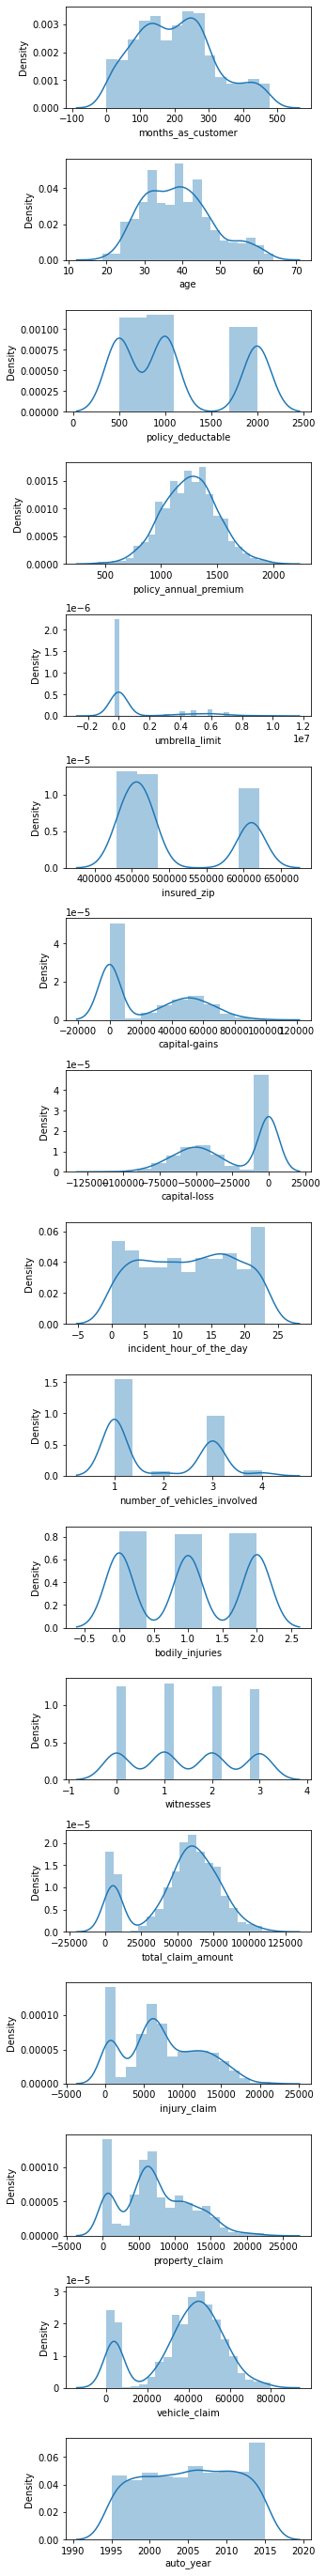

In [133]:
#plotting distribution plot
plt.figure(figsize=(5,40))
plotnumber=1
for column in cont_features:
    if plotnumber<=18:
        ax=plt.subplot(18,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()
    

**By looking at the plots we can see that in columns months_as_customer,age,policy_deductable,policy_annual_premium,incident_hour_of_the_day,bodily_injuries,injury_claim,property_claim and auto year have normally distributed data and cant see any skewness, and rest all the columns may have have skewness and it can be seen that data is not distributed normally.** 

In [178]:
#checking value count
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

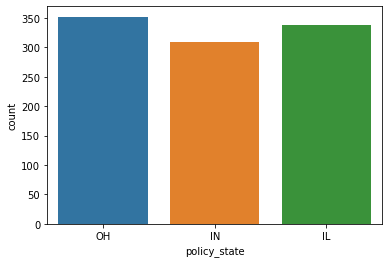

In [144]:
#plotting count plot
sns.countplot(x='policy_state',data=data)
plt.show()

**In this plot we can see that most of the policies are from the state OH that Ohio.**

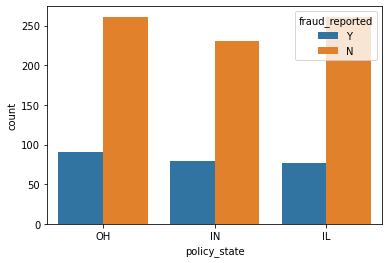

In [204]:
#plotting count plot
sns.countplot(x='policy_state',hue='fraud_reported',data=data)
plt.show()

**In thi splot we can see that most of the fraud casses were reported in state Ohio. and states in which frauds which were reported less were in Ohio and Illinois.**

In [179]:
#checking value count
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

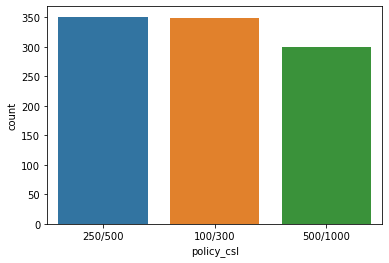

In [145]:
#plotting count plot
sns.countplot(x='policy_csl',data=data)
plt.show()

**In this plot we can see that most of the customer chose policy csl as 250/500.**

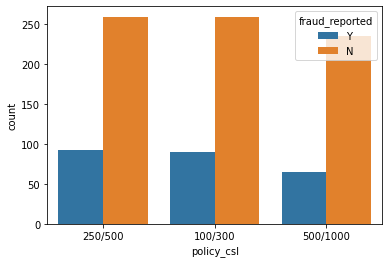

In [205]:
#plotting count plot
sns.countplot(x='policy_csl',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that customer who chose policy csl as 200/500 and 100/300 in that most of the times frauds were not reported and same in the case of frauds reported most of them were reported with policy csl 250/500 and 100/300.**

In [180]:
#checking value count
data['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

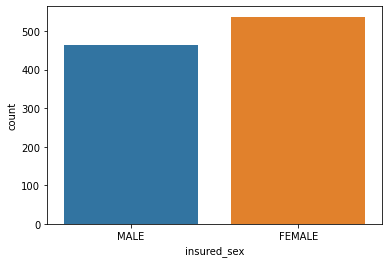

In [146]:
#plotting count plot
sns.countplot(x='insured_sex',data=data)
plt.show()

**In this plot we can see that most of the customers are female.**

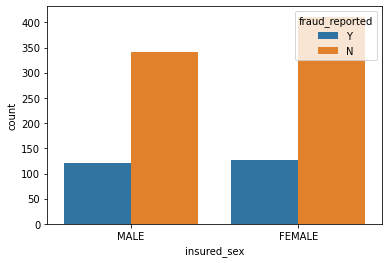

In [206]:
#plotting count plot
sns.countplot(x='insured_sex',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times frauds were not reported when it was an female customer and same in the caise of frauds reported.**

In [181]:
#checking value count
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

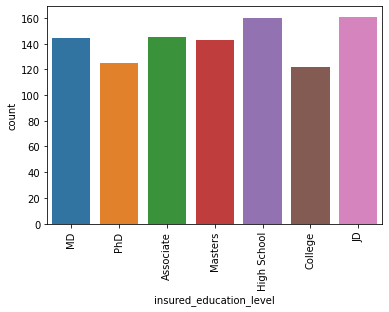

In [165]:
#plotting count plot
sns.countplot(x='insured_education_level',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the customer have education level of JD.**

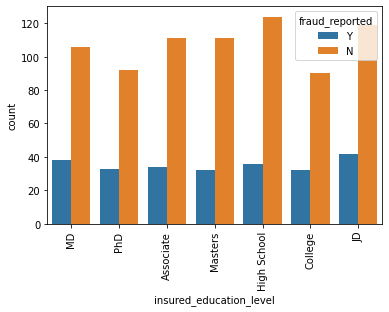

In [209]:
#plotting count plot
sns.countplot(x='insured_education_level',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having education level as high school and most of the times when fraud reported that time customer was having education level of  JD.**

In [182]:
#checking value count
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

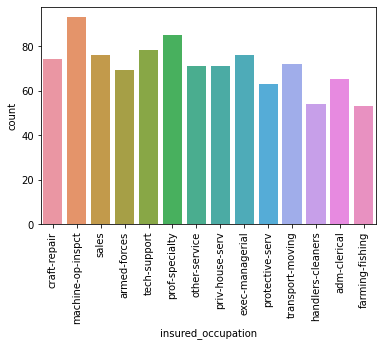

In [166]:
#plotting count plot
sns.countplot(x='insured_occupation',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the customer has a machine-op-inspct as occupation.**

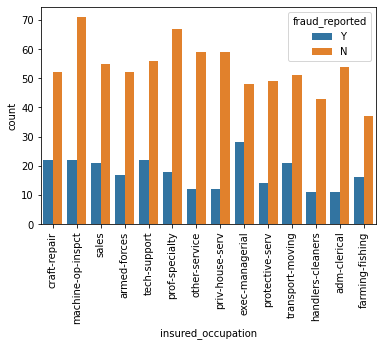

In [211]:
#plotting count plot
sns.countplot(x='insured_occupation',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having occupation as machine-op-inspct and most of the times when fraud reported that time customer was having occupatiion as exec-managerial.**

In [183]:
#checking value count
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

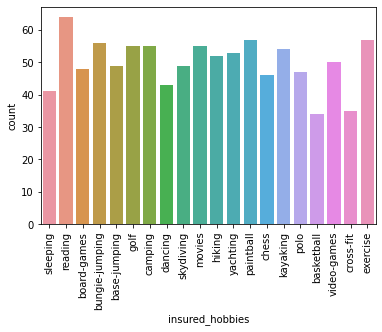

In [167]:
#plotting count plot
sns.countplot(x='insured_hobbies',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the customers hobby is reading.**

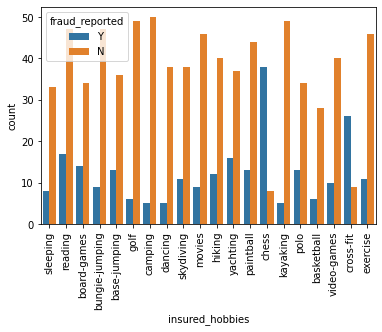

In [212]:
#plotting count plot
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having hobbies as  as camping and most of the times when fraud reported that time customer was having hobbies as playing chess.**

In [184]:
#checking value count
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

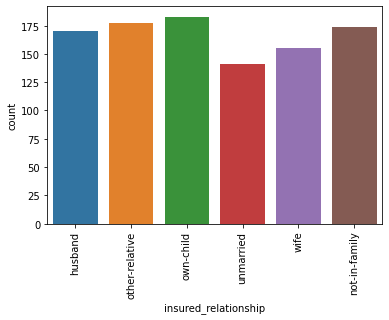

In [168]:
#plotting count plot
sns.countplot(x='insured_relationship',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the customer has a relationship as own child.**

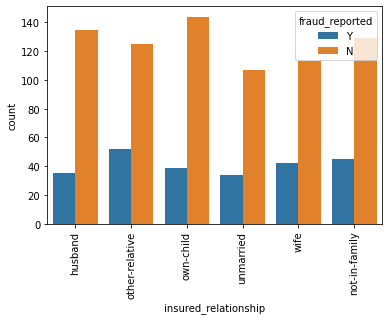

In [213]:
#plotting count plot
sns.countplot(x='insured_relationship',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having relationship as own child and most of the times when fraud reported that time customer was having relationship as other-relative.**

In [185]:
#checking value count
data['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

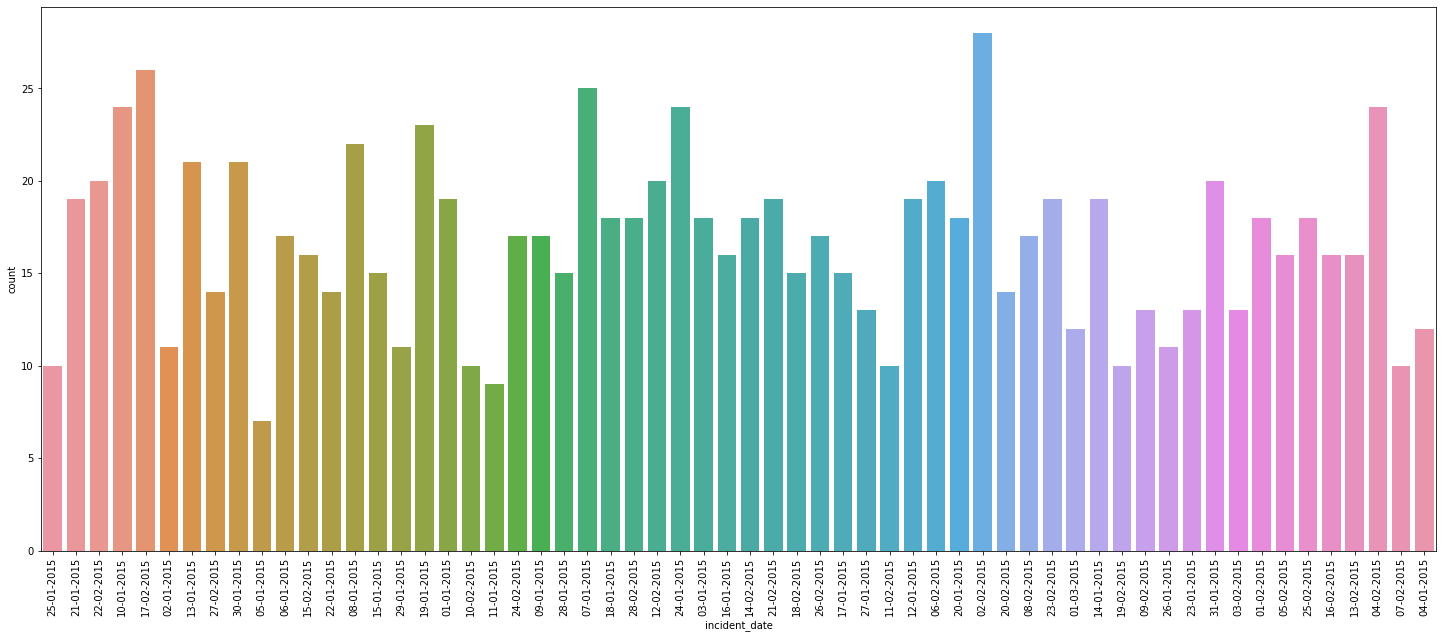

In [170]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='incident_date',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the incidents were reported on 02-02-2015.**

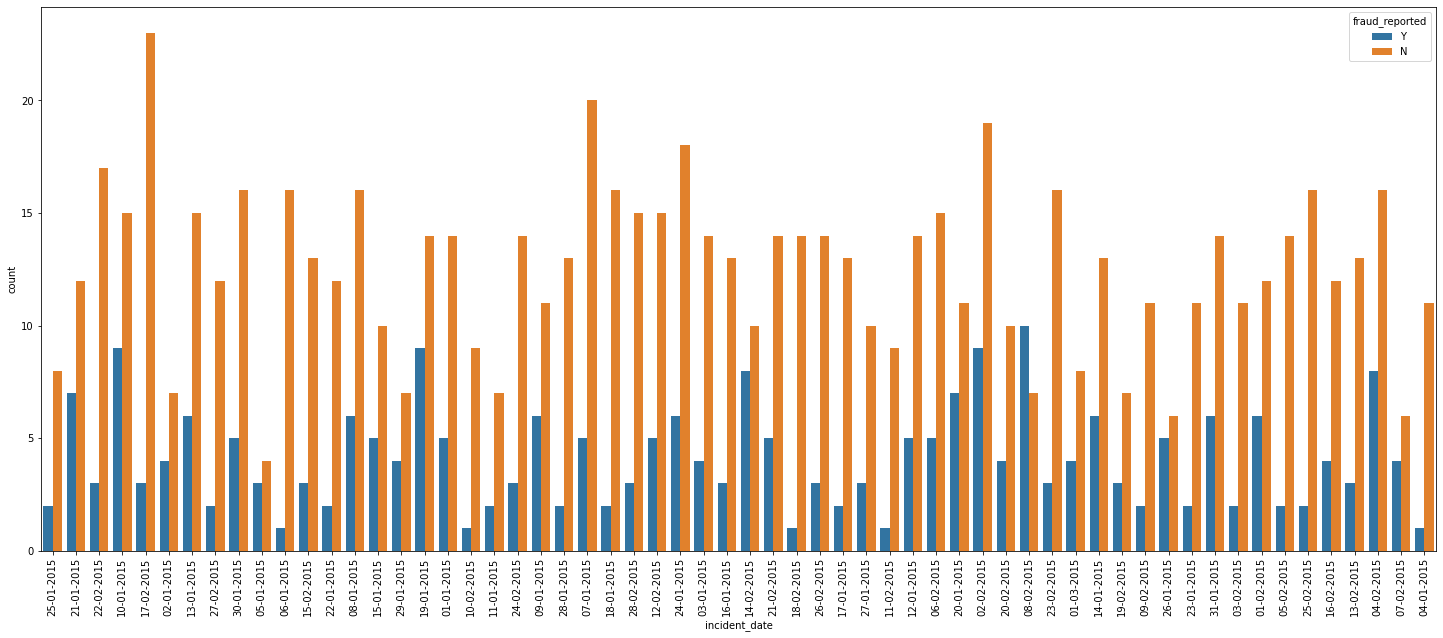

In [214]:
#plotting count plot
plt.figure(figsize=(25,10))
sns.countplot(x='incident_date',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the incidents were reported on 17/02/2015 and most of the times when fraud reported that time most of the incidents were reported on 08/02/2015.**

In [186]:
#checking value count
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

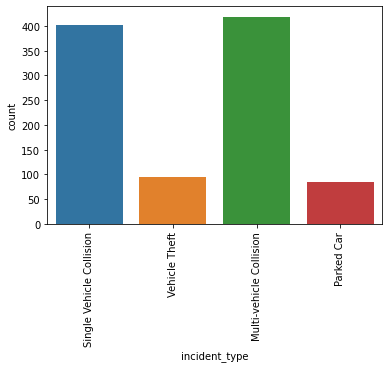

In [171]:
#plotting count plot
sns.countplot(x='incident_type',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that  most of the incident types were Multi-vehicle Collisions.**

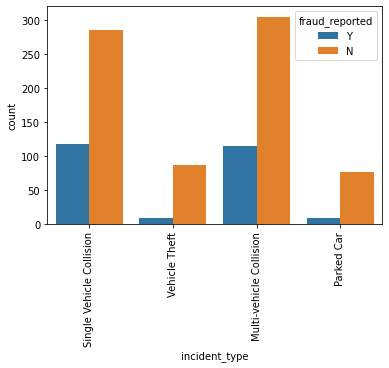

In [215]:
#plotting count plot
sns.countplot(x='incident_type',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the incident types were multi-vehicle collision and most of the times when fraud reported that time most of the incidents types were single-vehicle collision .**

In [187]:
#checking value count
data['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

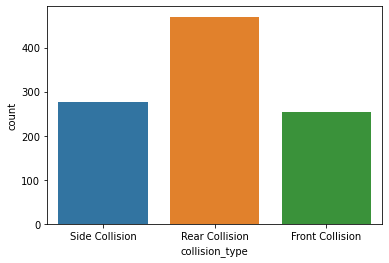

In [153]:
#plotting count plot
sns.countplot(x='collision_type',data=data)
plt.show()

**In this plot we can see that most of the collision types were rear Collisions.**

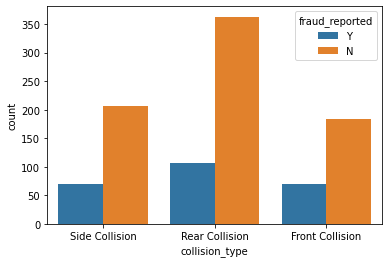

In [216]:
#plotting count plot
sns.countplot(x='collision_type',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the collision types were rear collision and most of the times when fraud reported that time most of the collision types were rear collision .**

In [188]:
#checking value count
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

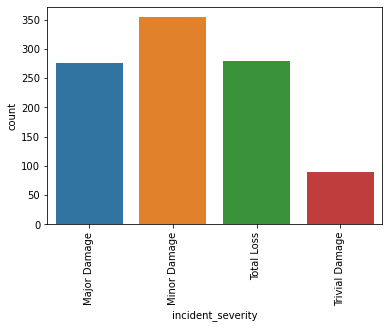

In [172]:
#plotting count plot
sns.countplot(x='incident_severity',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that there were minor damages after the incident.**

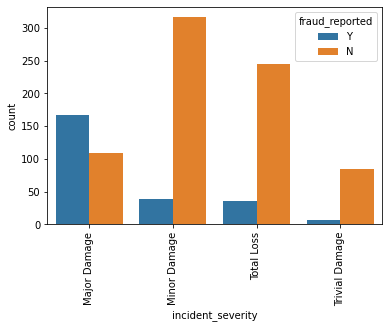

In [217]:
#plotting count plot
sns.countplot(x='incident_severity',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the incident severity was minor damage and most of the times when fraud reported that time most of the incident severity was Major damage.**

In [189]:
#checking value count
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

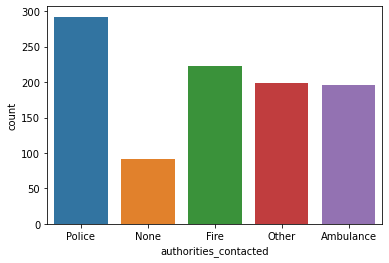

In [155]:
#plotting count plot
sns.countplot(x='authorities_contacted',data=data)
plt.show()

**In this plot we can see that most of the times after incident authorities contacted the most were police.**

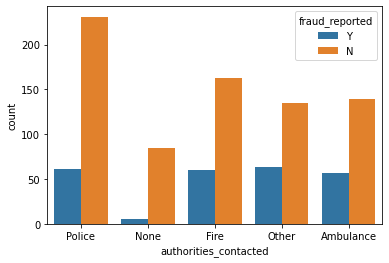

In [218]:
#plotting count plot
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time police were conctacted mostly and most of the times when fraud reported that time others authorities were mostly contacted .**

In [190]:
#checking value count
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

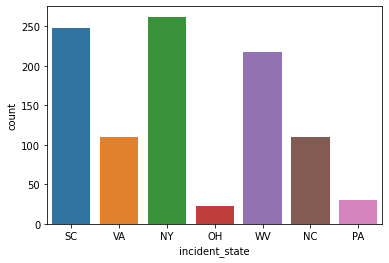

In [156]:
#plotting count plot
sns.countplot(x='incident_state',data=data)
plt.show()

**In this plot we can see that most of the incidents were reported in New York state.**

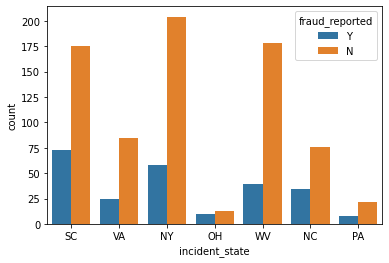

In [220]:
#plotting count plot
sns.countplot(x='incident_state',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time the state in which the incidents were reported mostly was New york and most of the times when fraud reported that time the state in which the incidents were reported mostly was south carolina.**

In [191]:
#checking value count
data['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

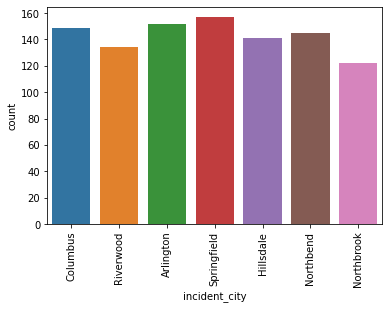

In [173]:
#plotting count plot
sns.countplot(x='incident_city',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the incidents were reported in Springfield city.**

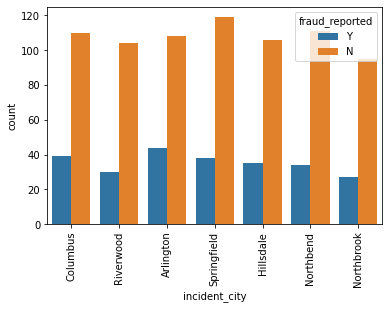

In [221]:
#plotting count plot
sns.countplot(x='incident_city',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time the city in which the incidents were reported mostly was springfield and most of the times when fraud reported that time the city in which the incidents were reported mostly was Arlington.**

In [192]:
#checking value count
data['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

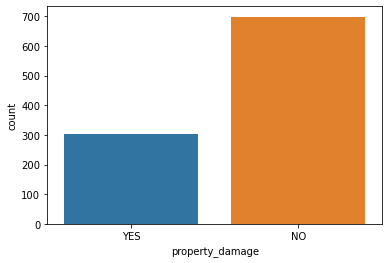

In [159]:
#plotting count plot
sns.countplot(x='property_damage',data=data)
plt.show()

**In this plot we can see that most of the times there were no property damages.**

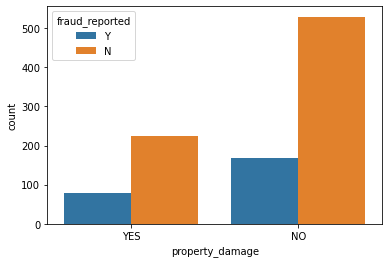

In [222]:
#plotting count plot
sns.countplot(x='property_damage',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time property was not damgaged most of the times and most of the times when fraud reported that time also property was not damaged most of the times.**

In [193]:
#checking value count
data['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

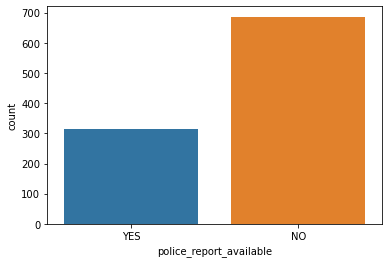

In [160]:
#plotting count plot
sns.countplot(x='police_report_available',data=data)
plt.show()

**In this plot we can see that most of the times there were no police report available.**

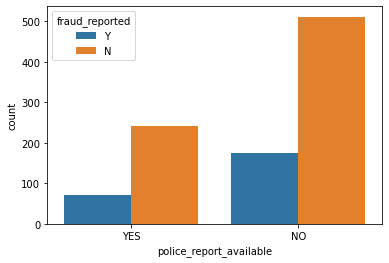

In [223]:
#plotting count plot
sns.countplot(x='police_report_available',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time police report was not available most of the times and most of the times when fraud reported that time also police report was not available most of the times.**

In [194]:
#checking value count
data['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

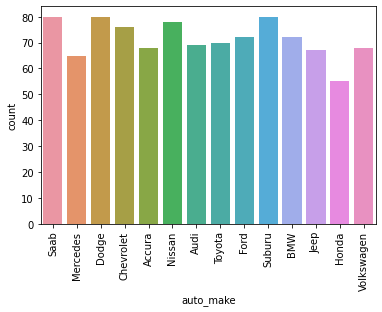

In [176]:
#plotting count plot
sns.countplot(x='auto_make',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the cars are of auto make Saab.**

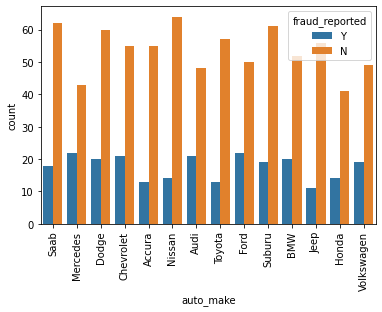

In [224]:
#plotting count plot
sns.countplot(x='auto_make',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time auto make was Nissan mostly and most of the times when fraud reported that time auto make was mercedes most of the times.**

In [195]:
#checking value count
data['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

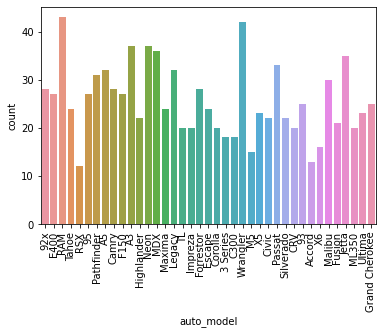

In [203]:
#plotting count plot
sns.countplot(x='auto_model',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the cars are with model RAM.**

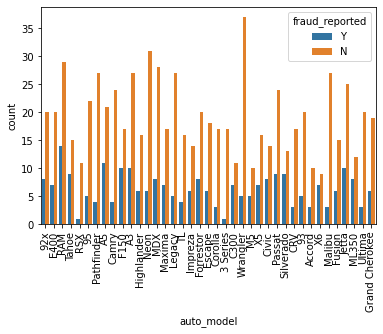

In [226]:
#plotting count plot
sns.countplot(x='auto_model',hue='fraud_reported',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time auto model was wrangler mostly and most of the times when fraud reported that time auto model was RAM mostly.**

In [196]:
#checking value count
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

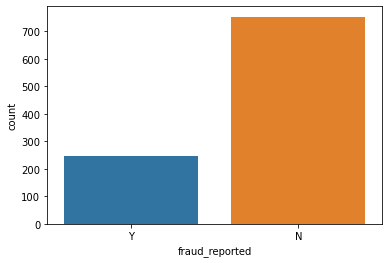

In [163]:
#plotting count plot
sns.countplot(x='fraud_reported',data=data)
plt.show()

**In this plot we can see that most of the times most of the it was not a fraud.Hence as fraud reported is a lable, it has a unbalanced dataset.so further i will be using smote technique to balance the data.**

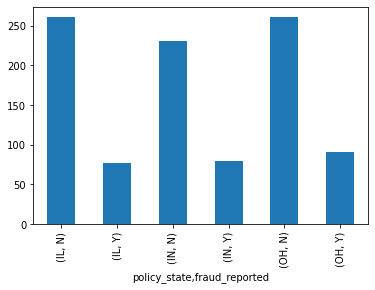

In [232]:
#plotting bar plot
data.groupby('policy_state')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In thi splot we can see that most of the fraud casses were reported in state Ohio. and states in which frauds which were reported less were in Ohio and Illinois.**

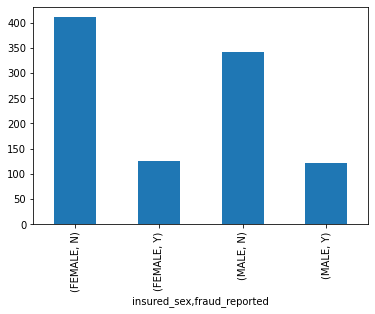

In [233]:
#plotting bar plot
data.groupby('insured_sex')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times frauds were not reported when it was an female customer and same in the caise of frauds reported.**

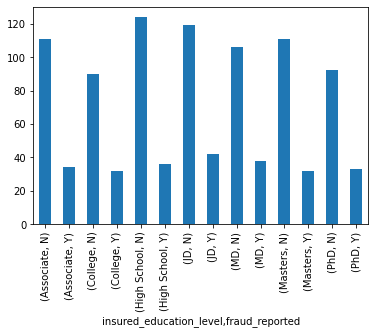

In [234]:
#plotting bar plot
data.groupby('insured_education_level')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having education level as high school and most of the times when fraud reported that time customer was having education level of JD.**

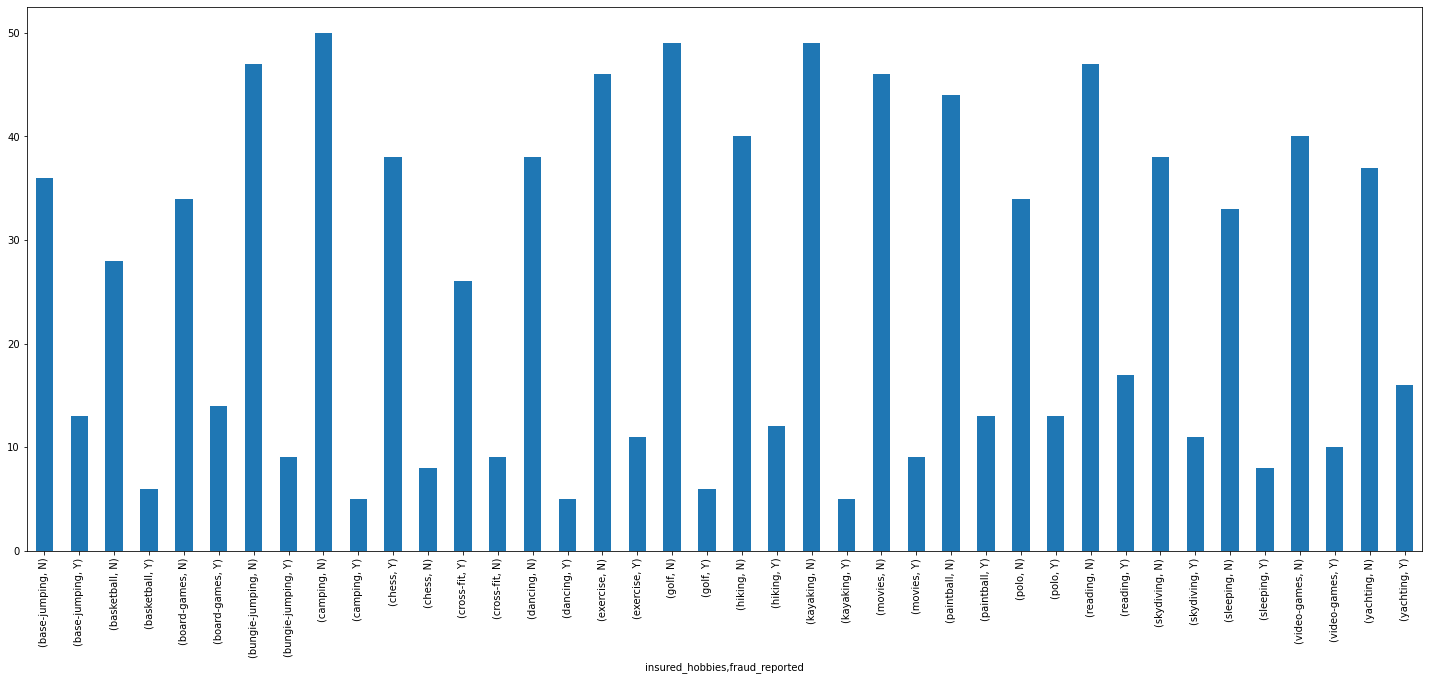

In [269]:
#plotting bar plot
plt.figure(figsize=(25,10))
data.groupby('insured_hobbies')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported customer was having hobbies as as camping and most of the times when fraud reported that time customer was having hobbies as playing chess.**

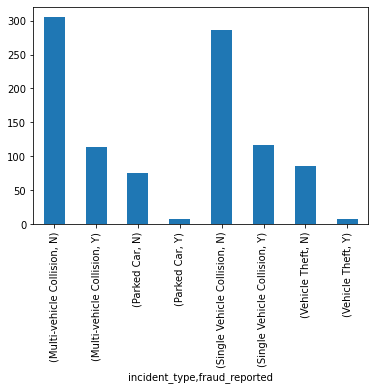

In [255]:
#plotting bar plot
data.groupby('incident_type')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the incident types were multi-vehicle collision and most of the times when fraud reported that time most of the incidents types were single-vehicle collision .**

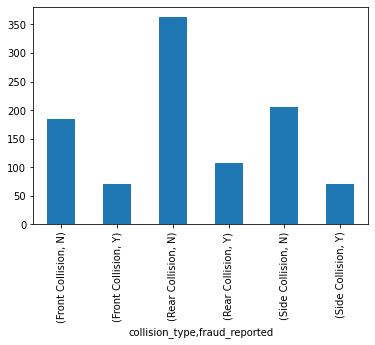

In [256]:
#plotting bar plot
data.groupby('collision_type')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the collision types were rear collision and most of the times when fraud reported that time most of the collision types were rear collision .**

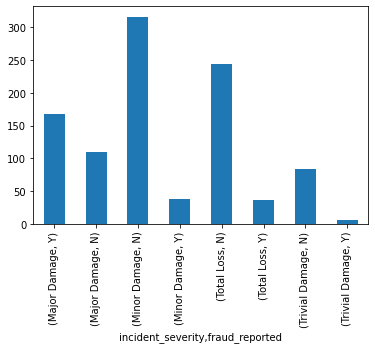

In [257]:
#plotting bar plot
data.groupby('incident_severity')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time most of the incident severity was minor damage and most of the times when fraud reported that time most of the incident severity was Major damage.**

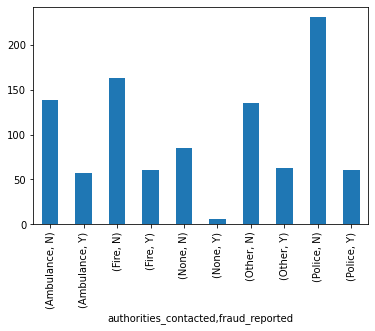

In [258]:
#plotting bar plot
data.groupby('authorities_contacted')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time police were conctacted mostly and most of the times when fraud reported that time others authorities were mostly contacted .**

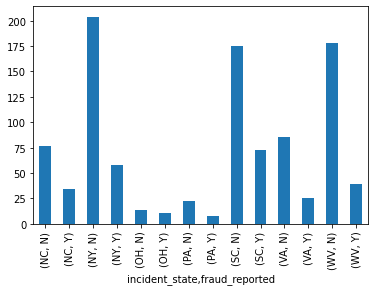

In [259]:
#plotting bar plot
data.groupby('incident_state')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time the state in which the incidents were reported mostly was New york and most of the times when fraud reported that time the state in which the incidents were reported mostly was south carolina.**

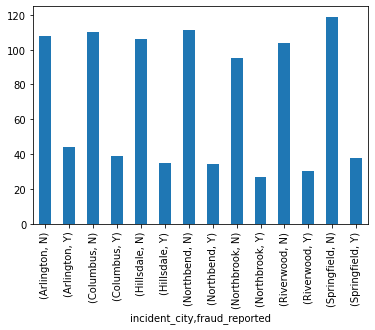

In [260]:
#plotting bar plot
data.groupby('incident_city')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time the city in which the incidents were reported mostly was springfield and most of the times when fraud reported that time the city in which the incidents were reported mostly was Arlington.**

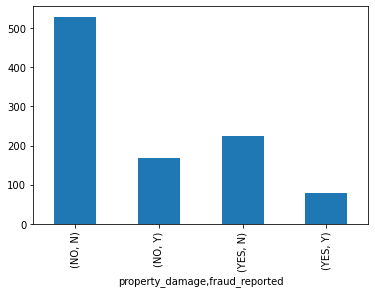

In [261]:
#plotting bar plot
data.groupby('property_damage')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time property was not damgaged most of the times and most of the times when fraud reported that time also property was not damaged most of the times.**

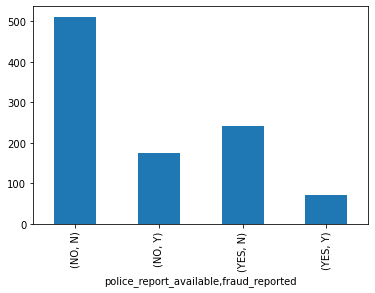

In [262]:
#plotting bar plot
data.groupby('police_report_available')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time police report was not available most of the times and most of the times when fraud reported that time also police report was not available most of the times.**

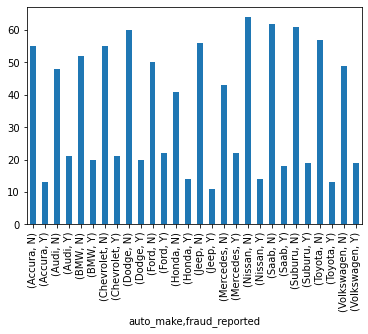

In [263]:
#plotting bar plot
data.groupby('auto_make')['fraud_reported'].value_counts().plot.bar()
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time auto make was Nissan mostly and most of the times when fraud reported that time auto make was mercedes most of the times.**

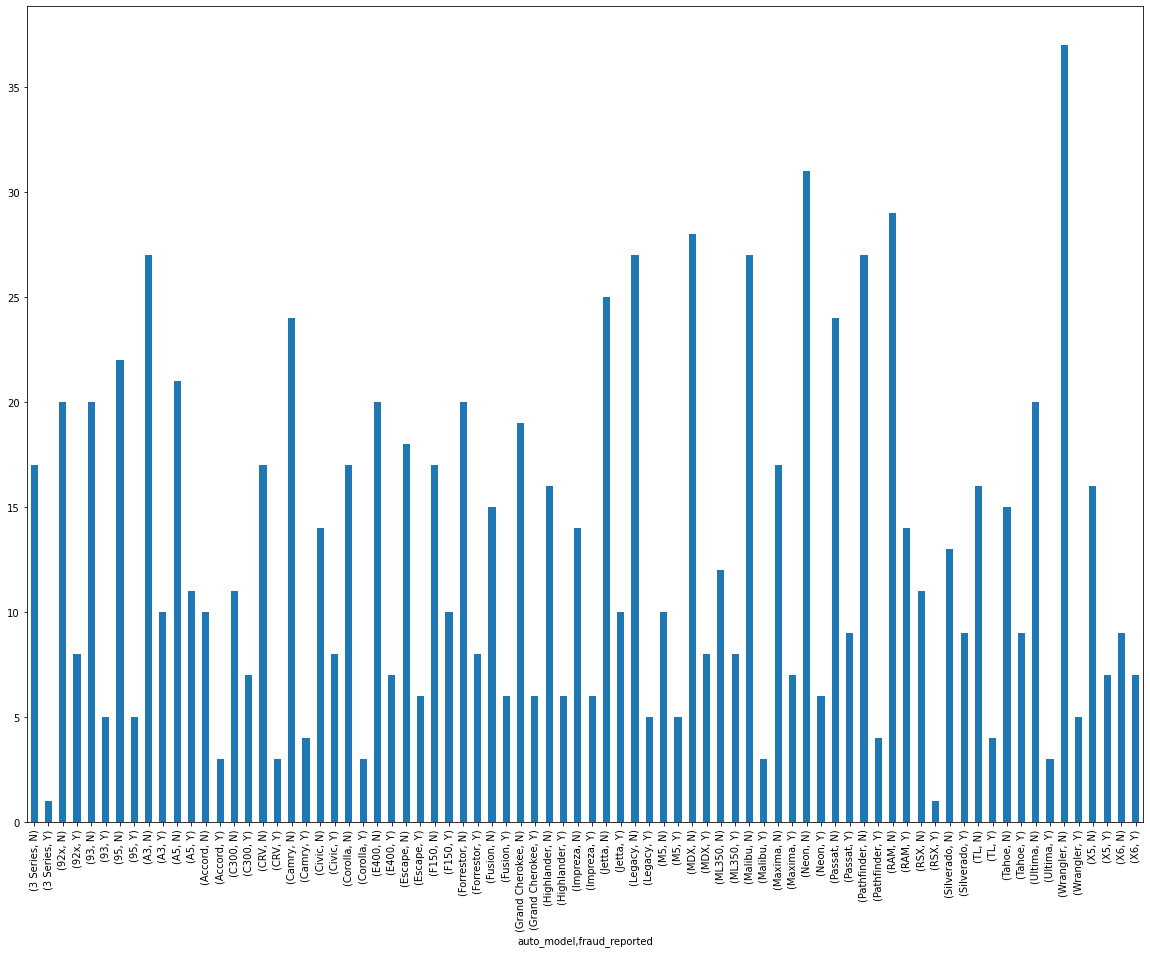

In [268]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('auto_model')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when frauds were not reported that time auto model was wrangler mostly and most of the times when fraud reported that time auto model was RAM mostly.**

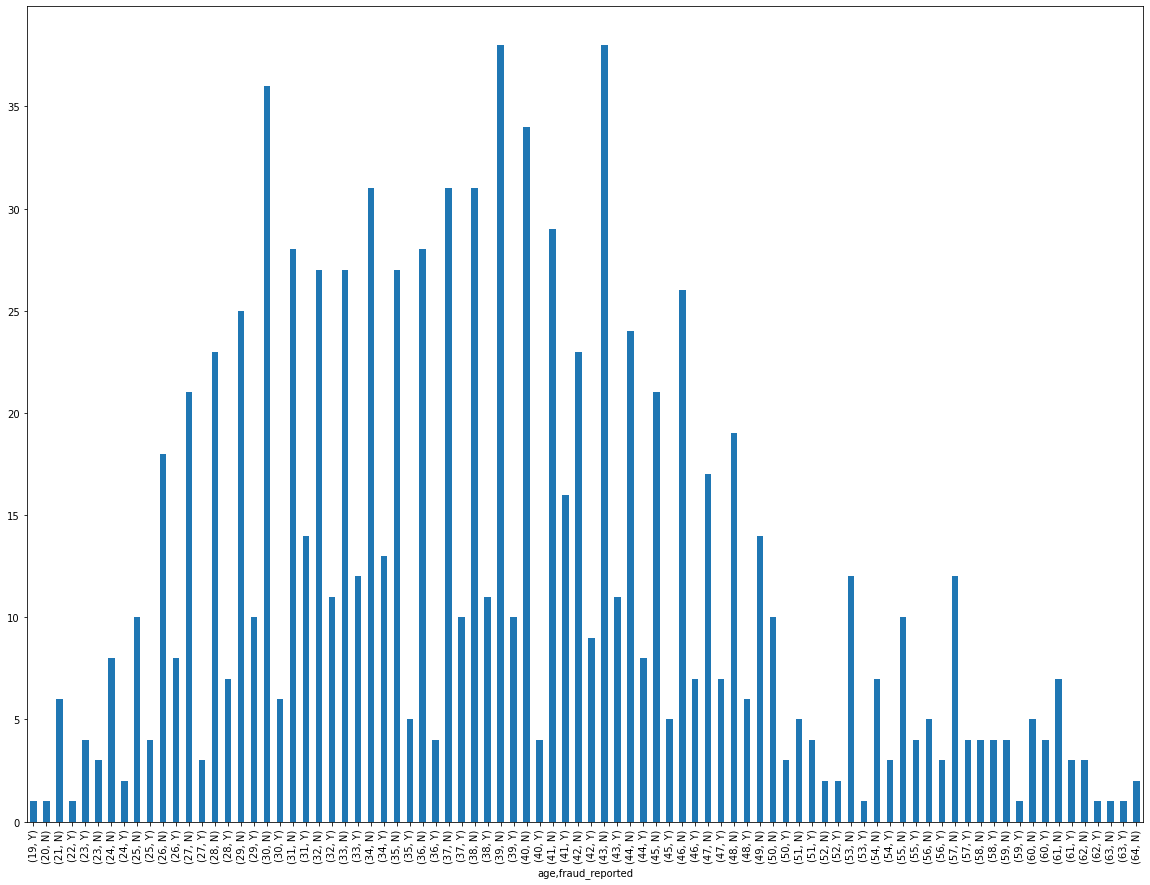

In [271]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('age')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported the age of most of the customers were 39 years and 43 years and when the most of the times fraud reported the age was 31 years.**

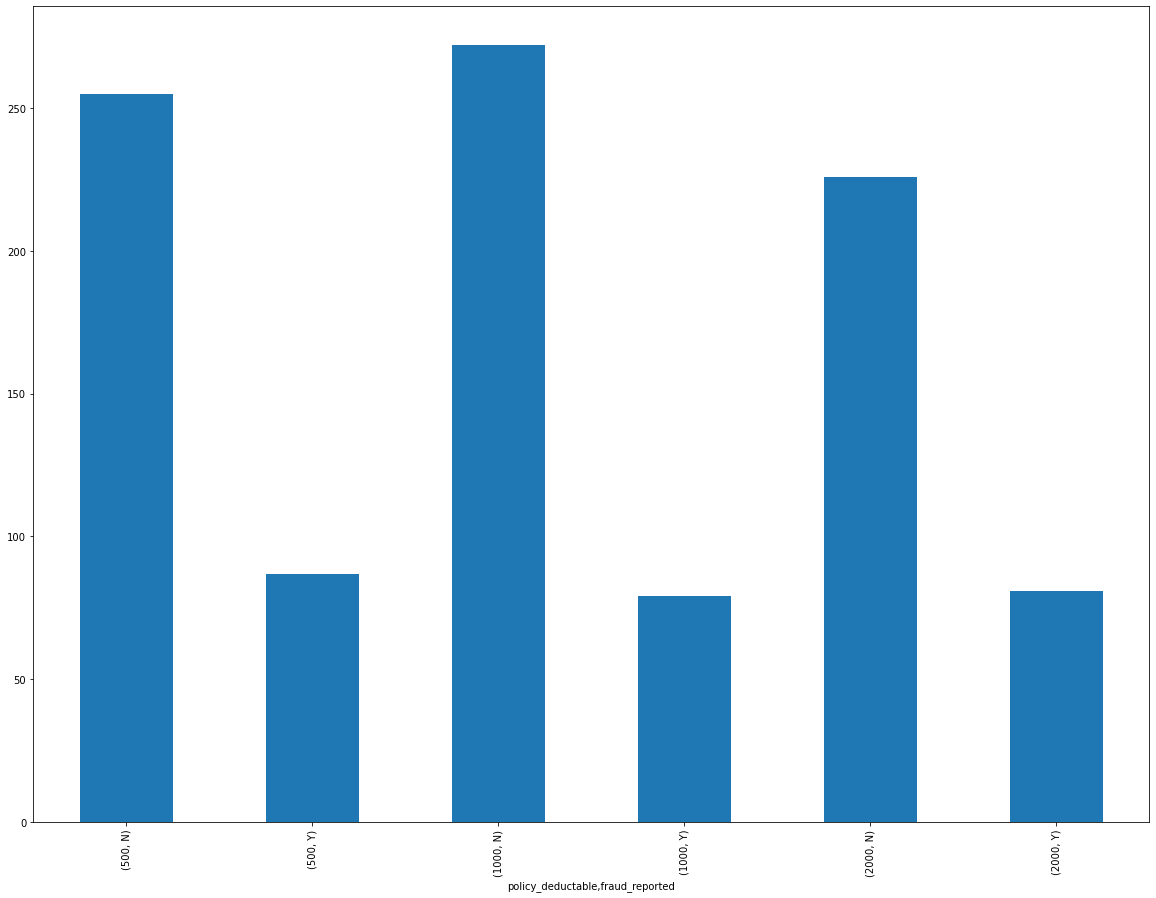

In [241]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('policy_deductable')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times plicy deductable was 1000 and when the most of the times fraud reported the policy deductable was 500.**

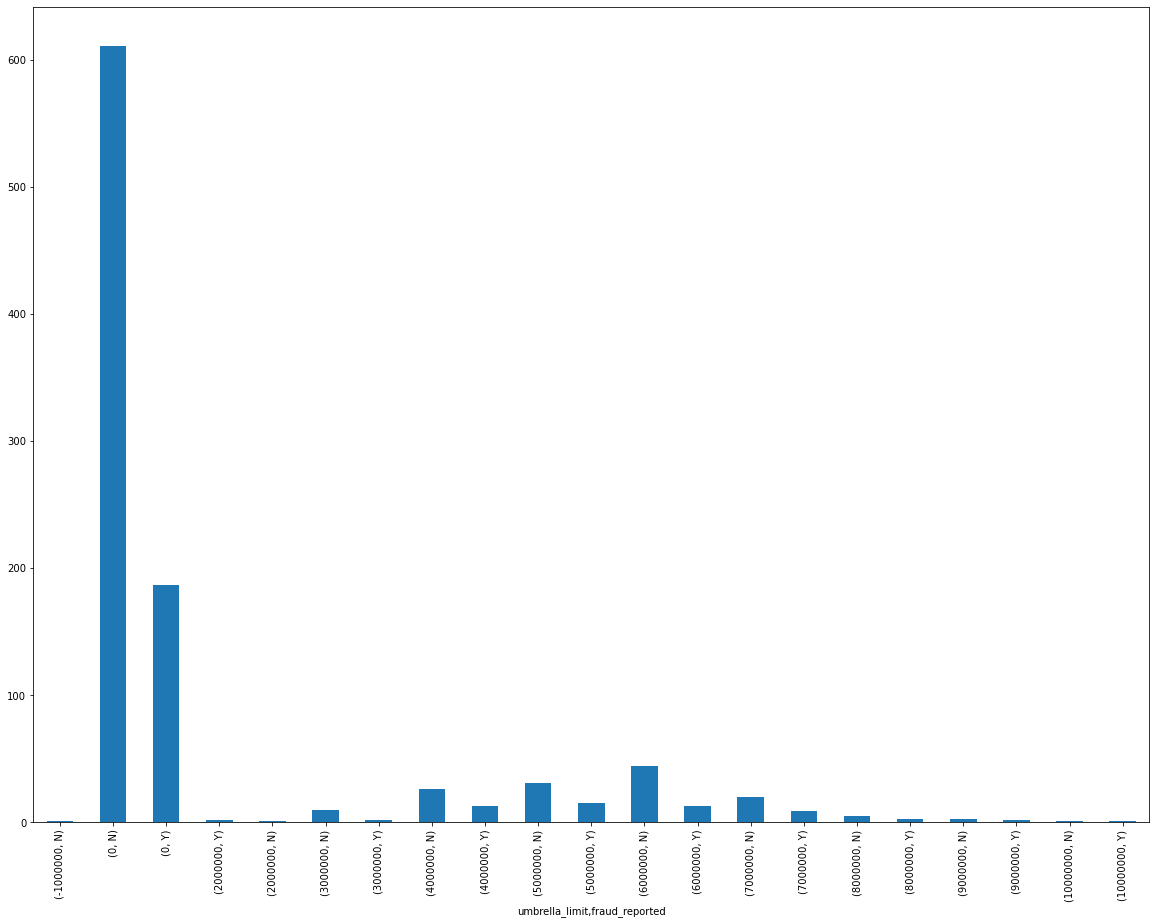

In [243]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('umbrella_limit')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times umbrella limit was 0 and when the most of the times fraud reported most of the times umbrella limit was 0.

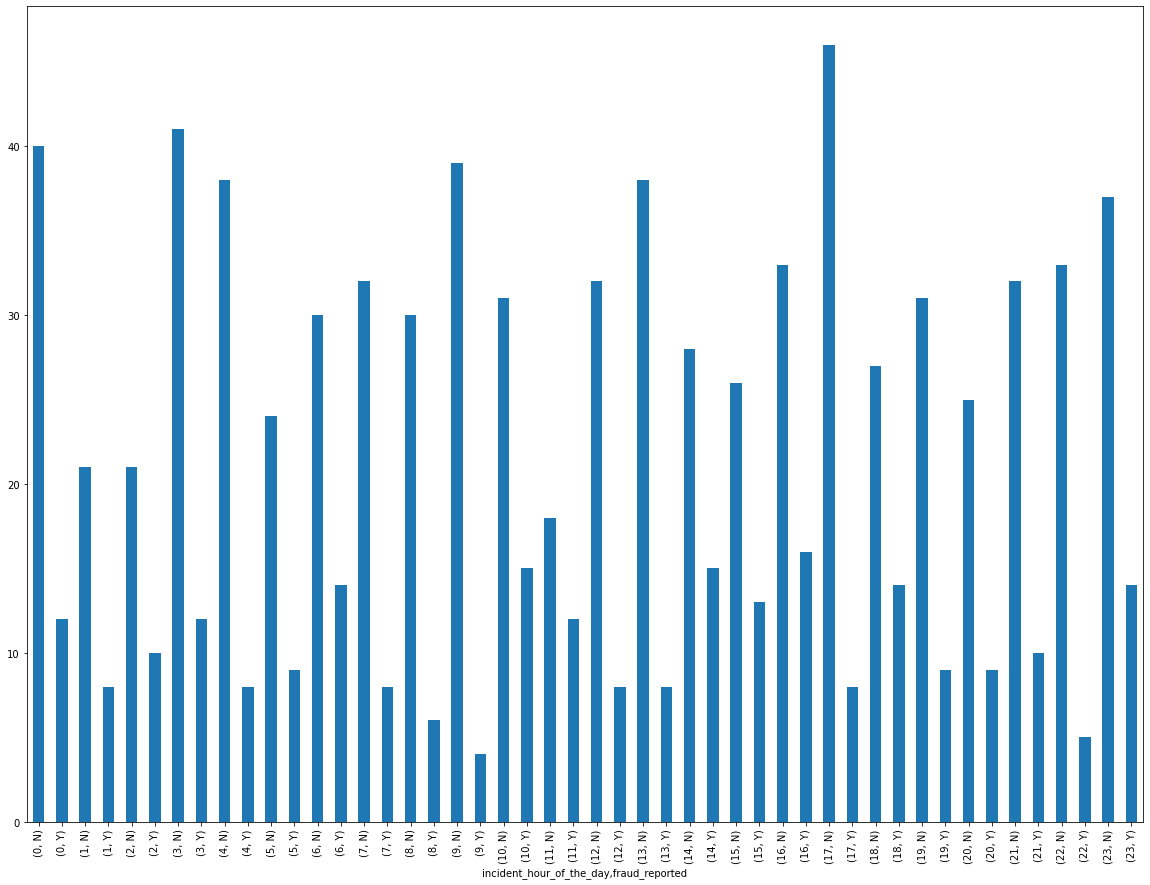

In [246]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('incident_hour_of_the_day')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times incident hour of the day was 17 and when the most of the times fraud reported incident hour of the day was 16.**

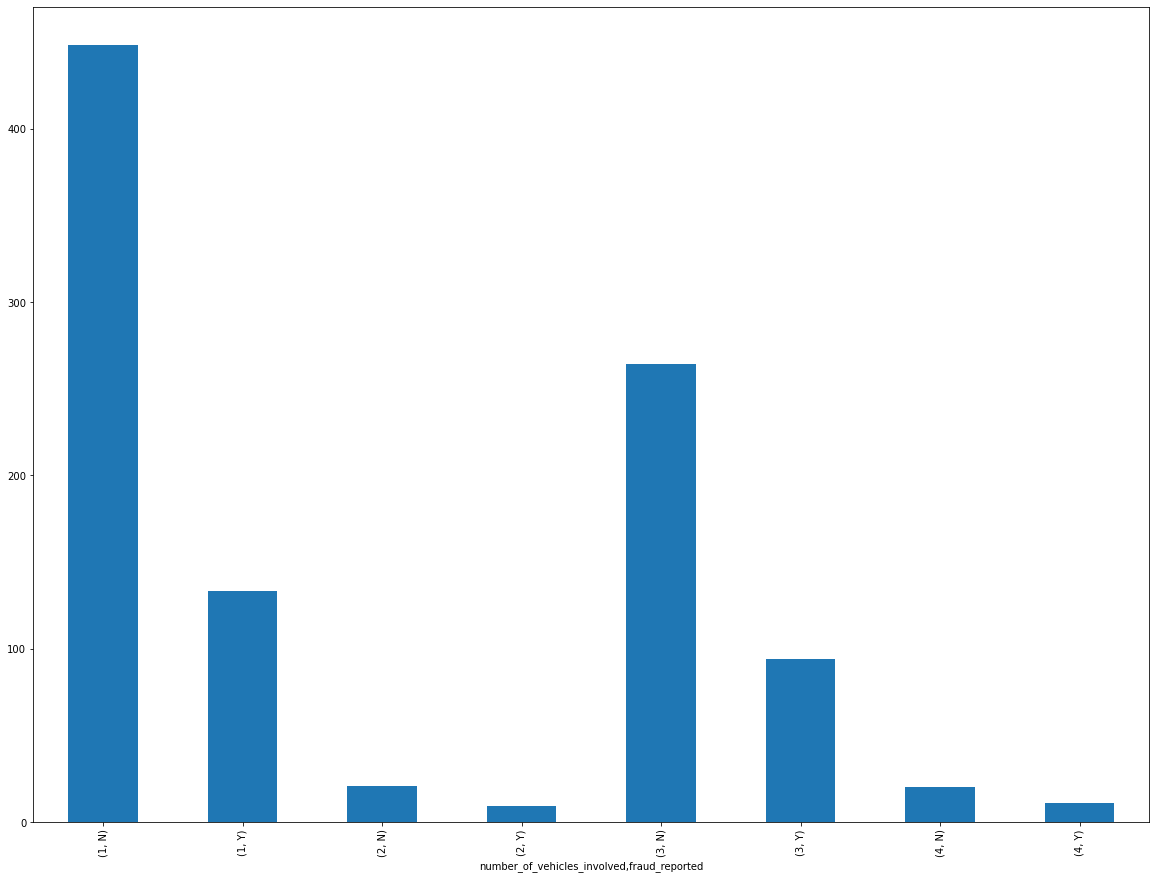

In [247]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('number_of_vehicles_involved')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times number of vehicles involved was 1 and when the most of the times number of vehicles involved was 1.**

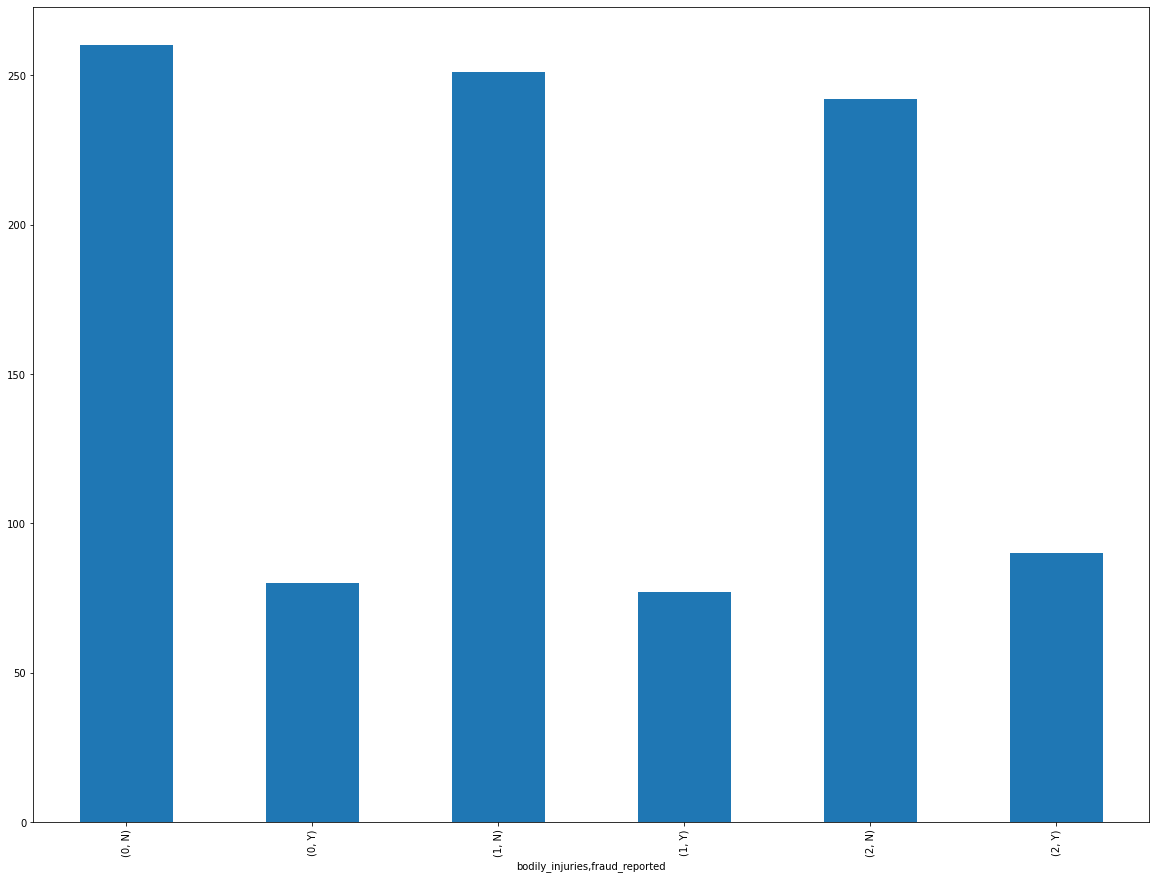

In [248]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('bodily_injuries')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times bodily injuries was 0 and when the most of the times bodily injuries was 2.**

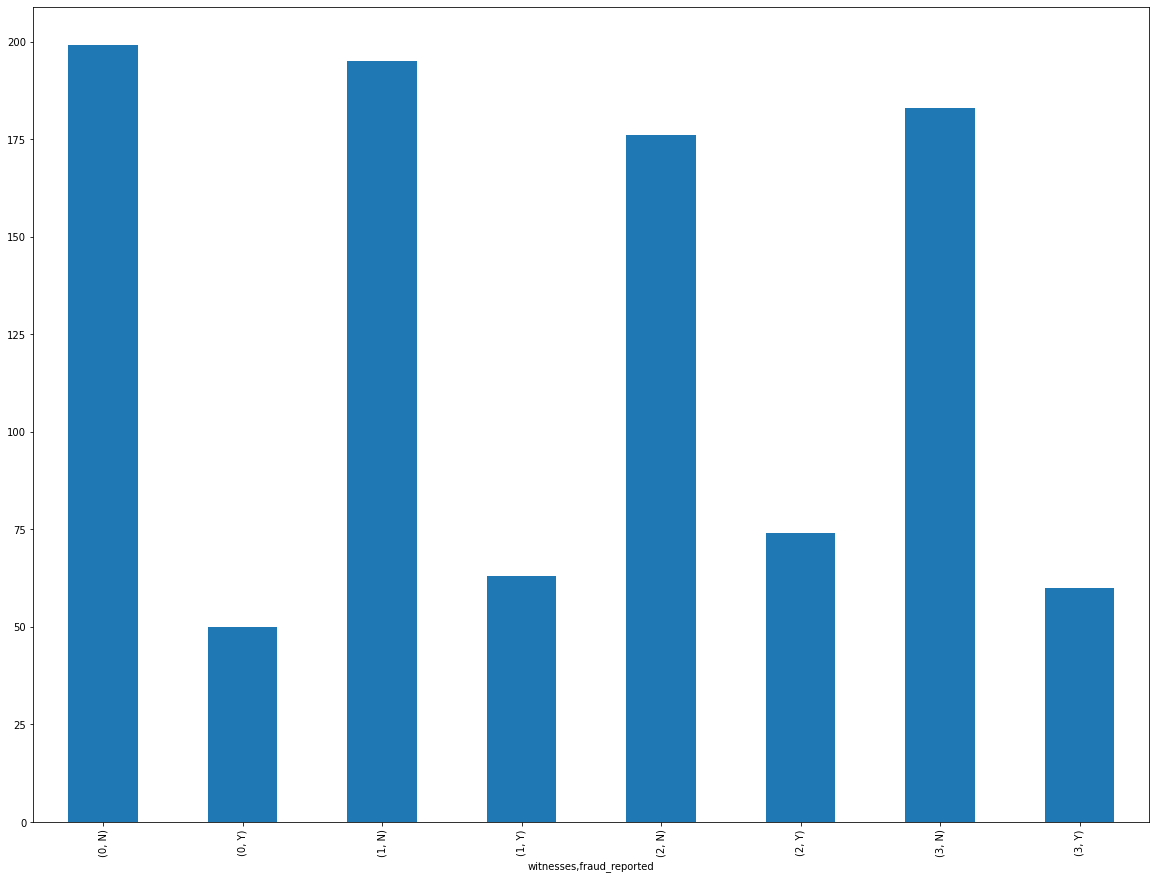

In [249]:
#plotting bar plot
plt.figure(figsize=(20,15))
data.groupby('witnesses')['fraud_reported'].value_counts().plot.bar()
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that most of the times when fraud was not reported most of the times witnesses which were present were 0 and when the most of the times witnesses which were present were 2.**

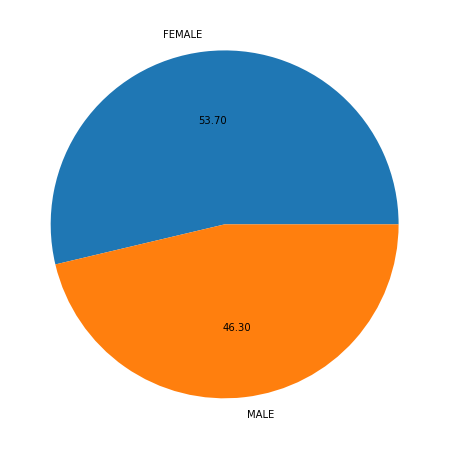

In [281]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='FEMALE','MALE'
plt.pie(x=data['insured_sex'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that fermale percenetage is more than male, i mean the number of females are more than male.**

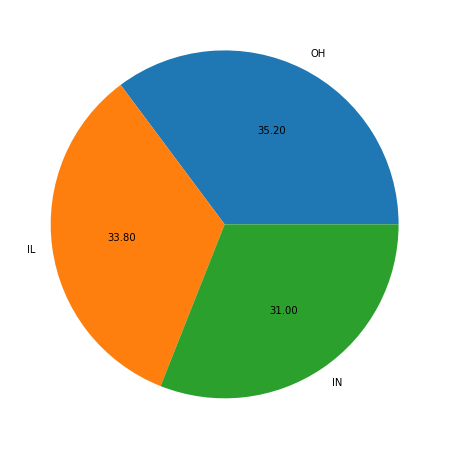

In [283]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='OH','IL','IN'
plt.pie(x=data['policy_state'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the policy holder  were from the state oh.**

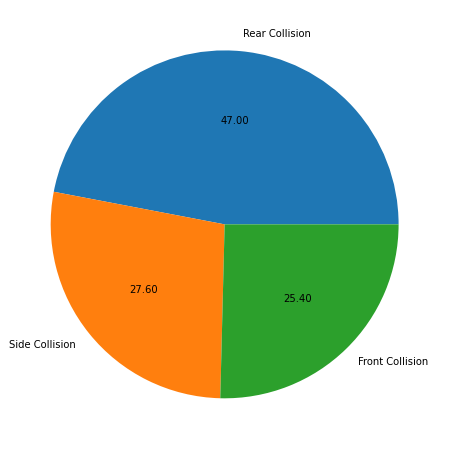

In [287]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Rear Collision','Side Collision','Front Collision'
plt.pie(x=data['collision_type'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the collison type were rear collision.**

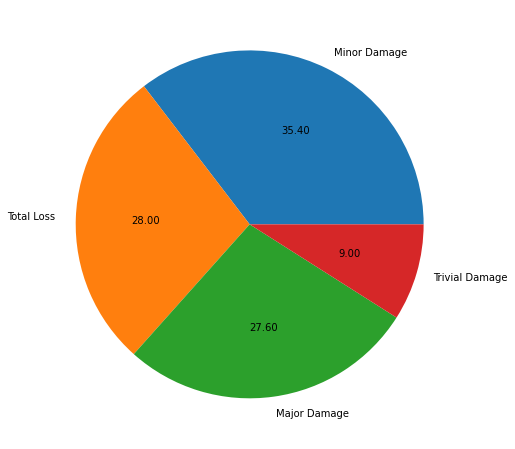

In [289]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='Minor Damage ','Total Loss ','Major Damage','Trivial Damage'
plt.pie(x=data['incident_severity'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the incident severity were minor damage.**

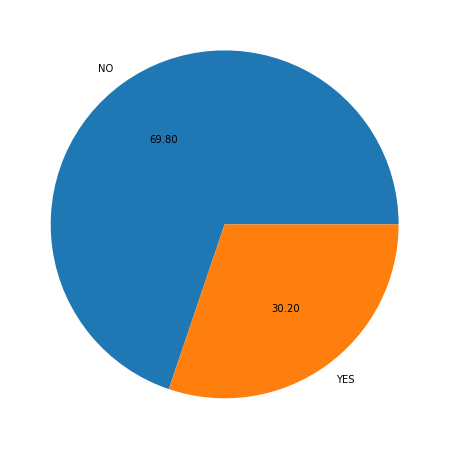

In [291]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='NO','YES'
plt.pie(x=data['property_damage'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times property damage was not there**

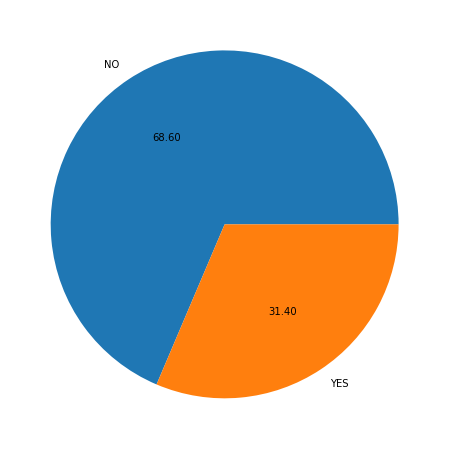

In [292]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='NO','YES'
plt.pie(x=data['police_report_available'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times police report was not available.**

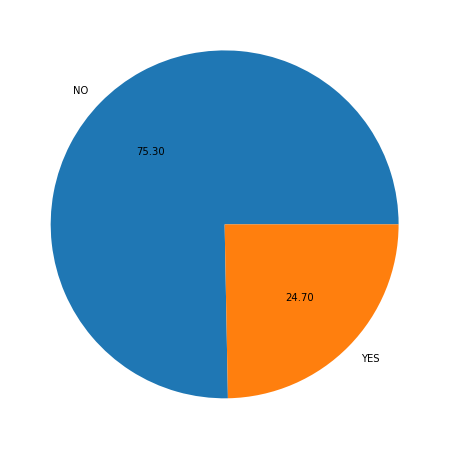

In [295]:
#plotting pie plot
plt.figure(figsize=(8,8))
labels='NO','YES'
plt.pie(x=data['fraud_reported'].value_counts(),labels=labels,autopct='%.2f')
plt.show()

**In this plot we can see that most of the times there were no fraud reported.**

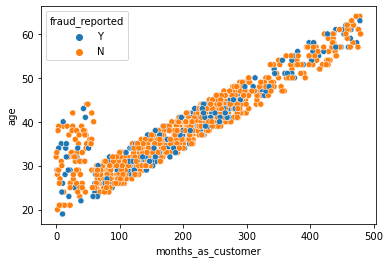

In [296]:
#plotting scatter plot
sns.scatterplot(x='months_as_customer',y='age',hue='fraud_reported',data=data)
plt.show()

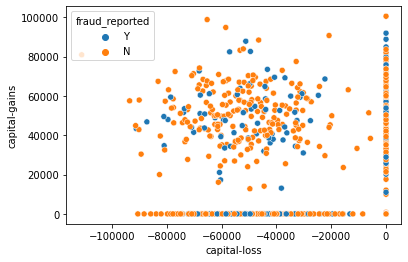

In [297]:
#plotting scatter plot
sns.scatterplot(x='capital-loss',y='capital-gains',hue='fraud_reported',data=data)
plt.show()

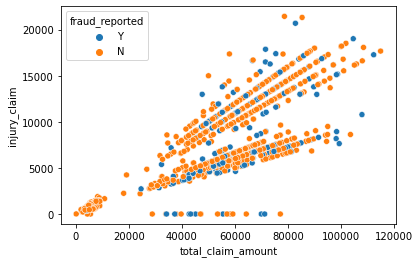

In [298]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='injury_claim',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that when the injury claim and total claim is between 0 to 20000 there is a not single fraud reported.**

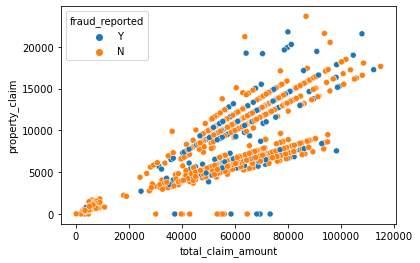

In [299]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='property_claim',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that when the injury claim and total claim is between 0 to 20000 there is a not single fraud reported.**

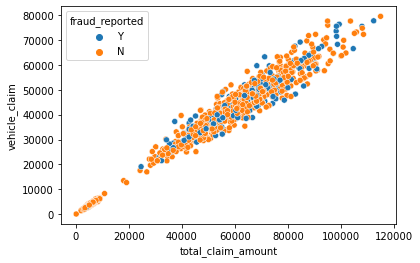

In [300]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',hue='fraud_reported',data=data)
plt.show()

**In this plot we can see that when the injury claim and total claim is between 0 to 20000 there is a not single fraud reported.**

In [455]:
#adding column vehicle age to the dataset
data['vehicle_age']=2015-data['auto_year']

In [456]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,11
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,8
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,8
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6


**So we can see that column vehicle age have been added to the dataset.**

**Observation**
* **Iam dropping column policy bind date as i already have month as customer column so that i will come to know about the period from where customer os using the insurance.**
* **Dropping column insuzed zip as i already have column state and city.**
* **Dropping incident date column as i dont find it relevant for prediction.**
* **Dropping auto year column as i already have the vehicle age column.**
* **Dropping incident location column as i dont find it relevant for prediction.**
* **Dropping auto year column as i already have the vehicle age colum.**

In [457]:
#dropping columns
data=data.drop(['policy_bind_date','insured_zip','incident_date','auto_year','incident_location'],axis=1)

In [458]:
#checking whether the columns have been dropped or not
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,8
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,6


**So we can see that 5 columns have been dropped from the dataset.**

In [459]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [460]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['policy_state'])
df2=lab_enc.fit_transform(data['policy_csl'])
df3=lab_enc.fit_transform(data['insured_sex'])
df4=lab_enc.fit_transform(data['insured_education_level'])
df5=lab_enc.fit_transform(data['insured_occupation'])
df6=lab_enc.fit_transform(data['insured_hobbies'])
df7=lab_enc.fit_transform(data['insured_relationship'])
df8=lab_enc.fit_transform(data['incident_type'])
df9=lab_enc.fit_transform(data['collision_type'])
df10=lab_enc.fit_transform(data['incident_severity'])
df11=lab_enc.fit_transform(data['authorities_contacted'])
df12=lab_enc.fit_transform(data['incident_state'])
df13=lab_enc.fit_transform(data['property_damage'])
df14=lab_enc.fit_transform(data['police_report_available'])
df15=lab_enc.fit_transform(data['auto_make'])
df16=lab_enc.fit_transform(data['auto_model'])
df17=lab_enc.fit_transform(data['fraud_reported'])
df18=lab_enc.fit_transform(data['incident_city'])

In [461]:
#Transfering the data 
data['policy_state']=df1
data['policy_csl']=df2
data['insured_sex']=df3
data['insured_education_level']=df4
data['insured_occupation']=df5
data['insured_hobbies']=df6
data['insured_relationship']=df7
data['incident_type']=df8
data['collision_type']=df9
data['incident_severity']=df10
data['authorities_contacted']=df11
data['incident_state']=df12
data['property_damage']=df13
data['police_report_available']=df14
data['auto_make']=df15
data['auto_model']=df16
data['fraud_reported']=df17
data['incident_city']=df18

In [462]:
#Checking whether the data is encoded or not
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,11
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,8
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,8
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,6


**So we can see that categorical columns have been encoded.**

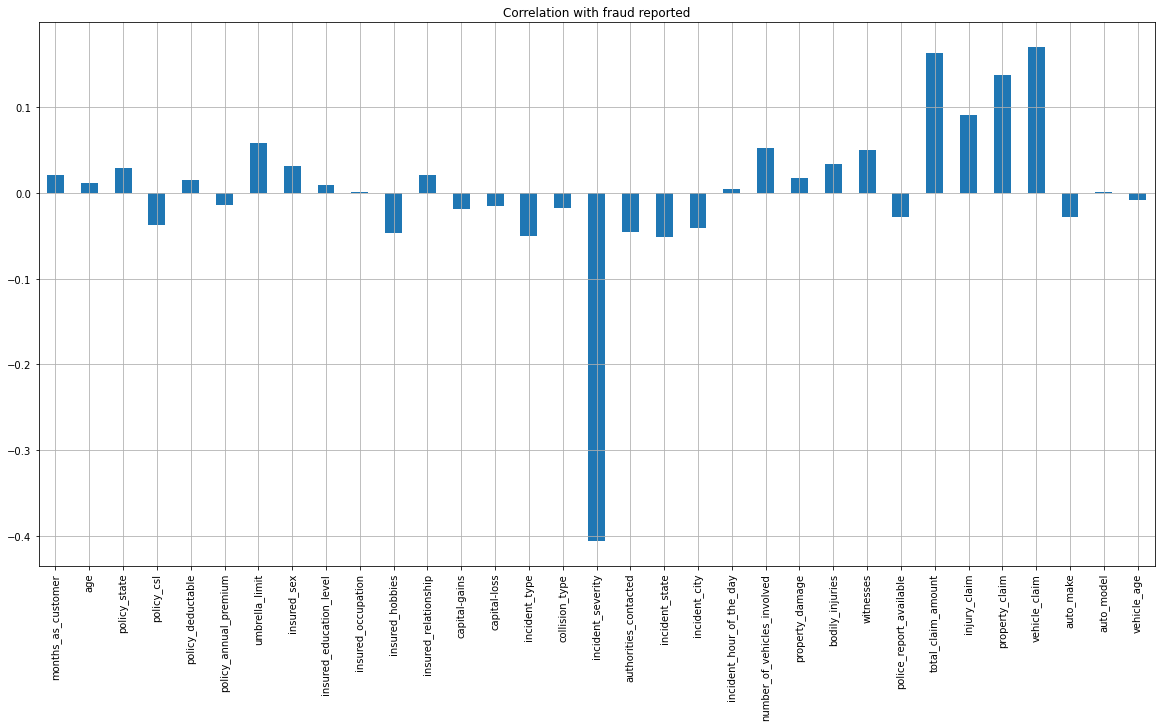

In [355]:
#Checking for correlation
data.drop(['fraud_reported'],axis=1).corrwith(data['fraud_reported']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with fraud reported')
plt.show()

**In this plot we can see that incident severity is highly correlated to the fraud reported that is the label and insured occupation,incident hour of the day and auto make are least correlated to the label.**

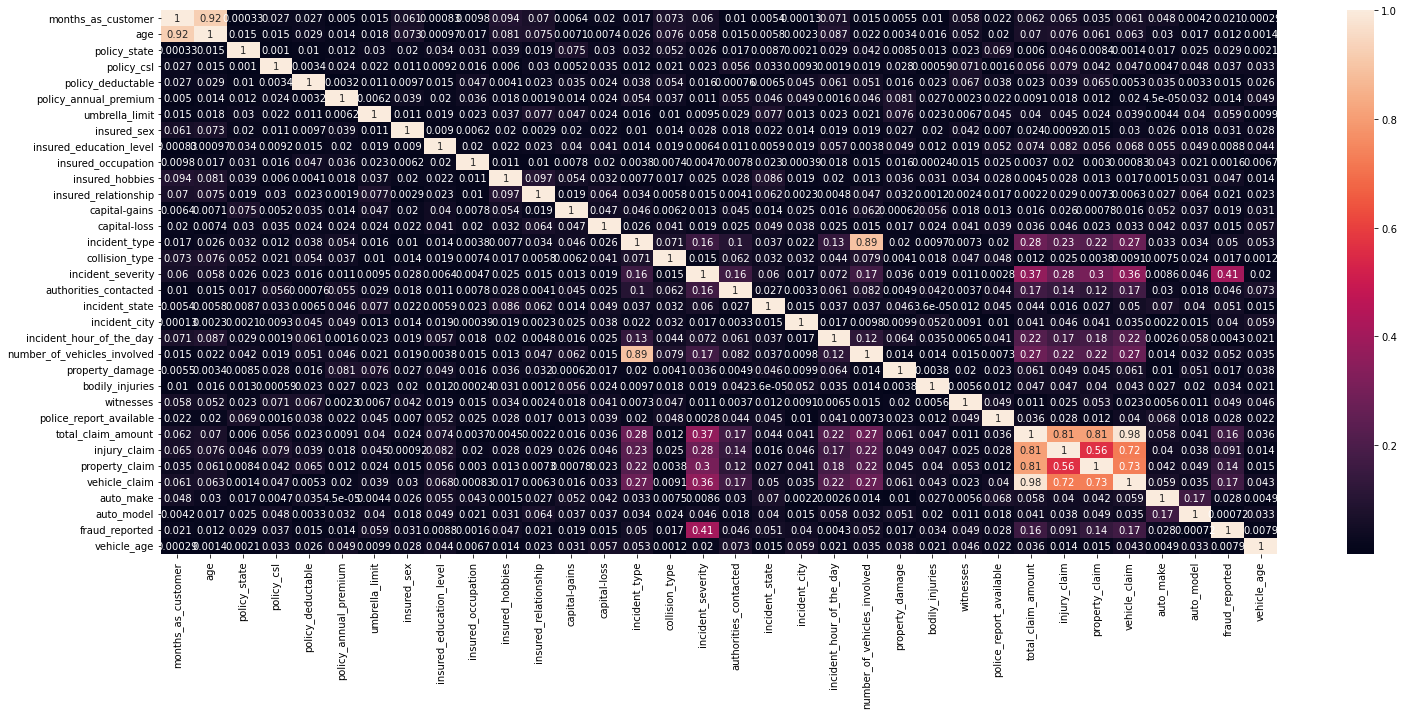

In [356]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **In this we can see that months as customer is multicorrelated with age.**
* **Incident type is multicorrelated with number of vehicles involved.**
* **total claim amount is multicorrelated with vehicle claim,property claim and injury claim.**
* **injury claim is multicorrelated with  vehicle claim and total claim amount.**
* **property claim is multicorrelated with vehicle claim and total claim amount.**
* **vehicle claim is multicorrelated with propert claim and injury claim.**
* **So to confirm whether they are multicorrelated or not i will plot scatter plot and will check the relatioship/trend.**

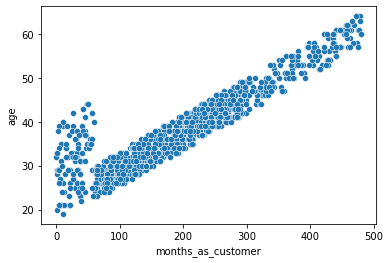

In [365]:
#plotting scatter plot
sns.scatterplot(x='months_as_customer',y='age',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

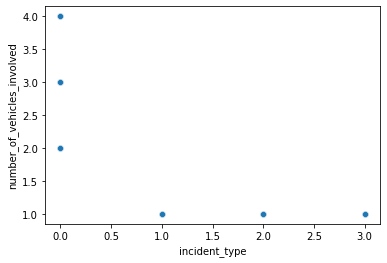

In [366]:
#plotting scatter plot
sns.scatterplot(x='incident_type',y='number_of_vehicles_involved',data=data)
plt.show()

**In this plot i dont see any positive relationship.**

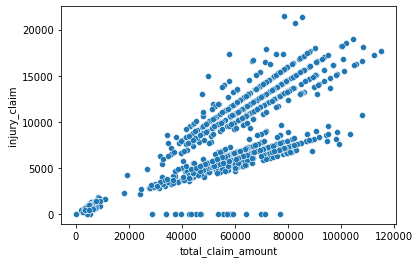

In [367]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='injury_claim',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

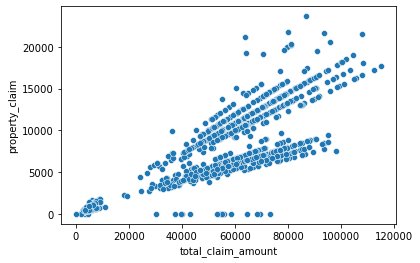

In [368]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='property_claim',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

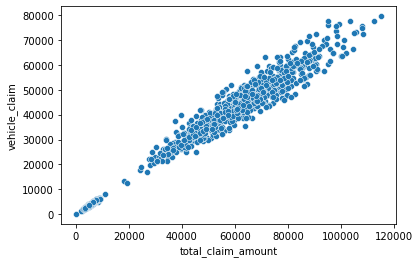

In [369]:
#plotting scatter plot
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

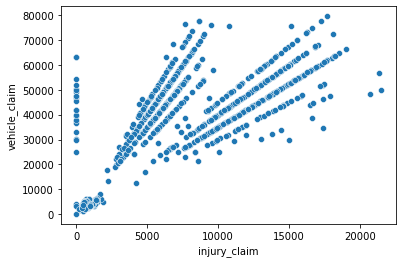

In [370]:
#plotting scatter plot
sns.scatterplot(x='injury_claim',y='vehicle_claim',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

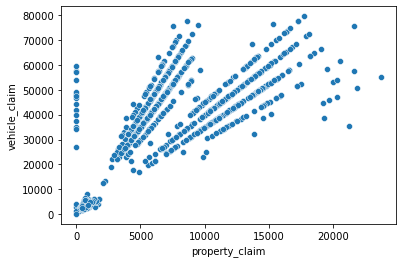

In [371]:
#plotting scatter plot
sns.scatterplot(x='property_claim',y='vehicle_claim',data=data)
plt.show()

**In this plot we can see a positive relationship/trend.**

**To cross verify i will use vif method to check whether they multicorrelated or not.**

In [463]:
df=data[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','vehicle_age']]
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,328,48,1000,1406.91,0,53300,0,5,1,2,71610,6510,13020,52080,11
1,228,42,2000,1197.22,5000000,0,0,8,0,0,5070,780,780,3510,8
2,134,29,2000,1413.14,5000000,35100,0,7,2,3,34650,7700,3850,23100,8
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,2,63400,6340,6340,50720,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,0,1,6500,1300,650,4550,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,0,1,87200,17440,8720,61040,9
996,285,41,1000,1436.79,0,70900,0,23,2,3,108480,18080,18080,72320,0
997,130,34,500,1383.49,3000000,35100,0,4,2,3,67500,7500,7500,52500,19
998,458,62,2000,1356.92,5000000,0,0,2,0,1,46980,5220,5220,36540,17


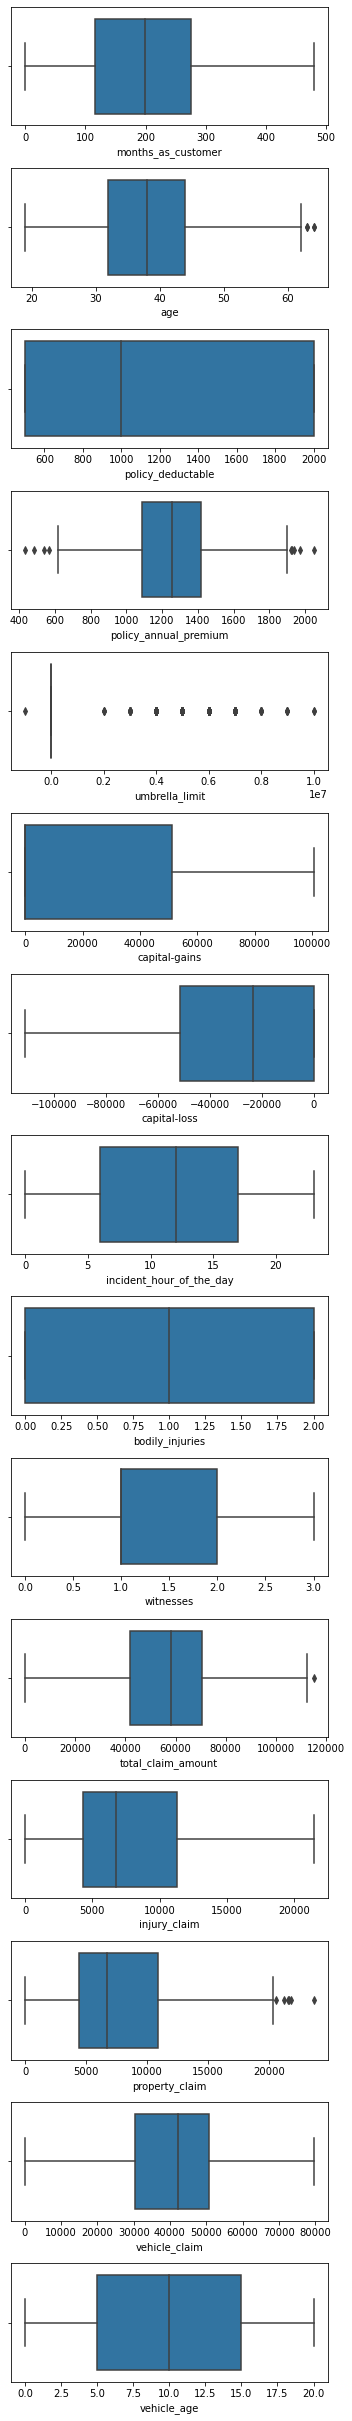

In [376]:
#plotting box plot
plt.figure(figsize=(5,40))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(18,1,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**By looking at the plot we can see that in column age,policy annual premium,umbrella limit,total claim amount and property claim have outliers.so using z-score method to remove the outliers.**

In [464]:
#Importing required libraries
from scipy.stats import zscore

In [465]:
#Removing outliers
z_score=zscore(data[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [466]:
data=data[z]

In [467]:
data.shape

(981, 34)

In [468]:
#Percentage Loss of Data
data_loss=((1000-981)/1000)*100
print(f'Data Loss:{data_loss} %')

Data Loss:1.9 %


In [469]:
#checking skewness for continuous columns
data.skew()

months_as_customer             0.363268
age                            0.475942
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567


**In this we can see that in column umbrella limit,number_of_vehicles_involved,total_claim_amount and vehicle_claim skewness is present. rest all the columns in which value is more than 0.5 than they are categorical columns and label and we dont treat skewness for categorical column and label.**

**Treating skewness using power transform method.**

In [470]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [471]:
#using power transform method
data[['umbrella_limit','number_of_vehicles_involved','total_claim_amount','vehicle_claim']]=power_transform(data[['umbrella_limit','number_of_vehicles_involved','total_claim_amount','vehicle_claim']],method='yeo-johnson')
data[['umbrella_limit','number_of_vehicles_involved','total_claim_amount','vehicle_claim']]

,umbrella_limit,number_of_vehicles_involved,total_claim_amount,vehicle_claim
0,-0.336839,-0.840390,0.719485,0.757816
1,1.483266,-0.840390,-1.778833,-1.788203
2,1.483266,1.193345,-0.717305,-0.821553
3,1.789387,-0.840390,0.394103,0.681441
4,1.789387,-0.840390,-1.731679,-1.741666
...,...,...,...,...
995,-0.336839,-0.840390,1.344860,1.265257
996,-0.336839,-0.840390,2.211895,1.913524
997,0.840603,1.193345,0.556225,0.781439
998,1.483266,-0.840390,-0.246792,-0.103047


In [472]:
#checking skewness
data.skew()

months_as_customer             0.363268
age                            0.475942
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                -7.939425
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567


In [479]:
#Dividing dataset into features and label
#Features
x=data.drop(['fraud_reported'],axis=1)
#Label
y=data['fraud_reported']

In [480]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 1.07026401,  0.98395561,  1.18044717, ...,  0.85297327,
        -1.63831727,  0.18670108],
       [ 0.20299132,  0.32998511, -0.02456706, ...,  0.35652309,
        -0.65005176, -0.31190262],
       [-0.61224501, -1.08695097,  1.18044717, ..., -0.63637727,
         0.96710998, -0.31190262],
       ...,
       [-0.64693592, -0.54197555,  1.18044717, ...,  1.10119836,
        -0.02115553,  1.51631096],
       [ 2.1977185 ,  2.50988678, -1.22958128, ..., -1.38105254,
        -1.27894799,  1.18390849],
       [ 2.18037305,  2.29189661,  1.18044717, ...,  0.35652309,
        -0.65005176, -0.31190262]])

In [481]:
x_scaler.shape

(981, 33)

In [482]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [483]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,6.895244,months_as_customer
1,6.909179,age
2,1.029289,policy_state
3,1.029543,policy_csl
4,1.043277,policy_deductable
5,1.033491,policy_annual_premium
6,1.035861,umbrella_limit
7,1.025635,insured_sex
8,1.041622,insured_education_level
9,1.015138,insured_occupation


**Observation**
* **So in this we can see that months_as_customer,age,incident_type,number_of_vehicles_involved,total_claim_amount,injury_claim,property_claim and vehicle claim are multicorrelated to each other.**
* **Since age is less correlated to the label so dropping column age.**
* **Dropping column total claim amount as it is the total of injury claim+property claim and vehicle claim.**

In [484]:
#dropping columns
x_scaler=data.drop(['age','total_claim_amount'],axis=1)
x_scaler

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,2,1,1000,1406.91,-0.336839,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,-0.840390,1,1,2,1,6510,13020,0.757816,10,1,1,11
1,228,1,1,2000,1197.22,1.483266,1,4,6,15,2,0,0,3,1,1,4,5,5,8,-0.840390,0,0,0,0,780,780,-1.788203,8,12,1,8
2,134,2,0,2000,1413.14,1.483266,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,1.193345,0,2,3,0,7700,3850,-0.821553,4,30,0,8
3,256,0,1,2000,1415.74,1.789387,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,-0.840390,0,1,2,0,6340,6340,0.681441,3,34,1,1
4,228,0,2,1000,1583.91,1.789387,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,-0.840390,0,0,1,0,1300,650,-1.741666,0,31,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1000,1310.80,-0.336839,0,5,2,13,4,0,0,2,0,1,1,0,4,20,-0.840390,1,0,1,0,17440,8720,1.265257,6,6,0,9
996,285,0,0,1000,1436.79,-0.336839,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,-0.840390,1,2,3,0,18080,18080,1.913524,13,28,0,0
997,130,2,1,500,1383.49,0.840603,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,1.193345,0,2,3,1,7500,7500,0.781439,11,19,0,19
998,458,0,2,2000,1356.92,1.483266,1,0,5,0,5,0,0,2,1,0,3,1,0,2,-0.840390,0,0,1,1,5220,5220,-0.103047,1,5,0,17


**Using feature selection method.**

In [492]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [493]:
best_features=SelectKBest(score_func=f_classif,k=26)
fit=best_features.fit(x_scaler,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(26,'Score'))

                   Feature_Name       Score
30                    auto_make         inf
15               collision_type  188.281458
27                 injury_claim   28.733875
26           total_claim_amount   19.120770
25      police_report_available    7.670832
17        authorities_contacted    2.591913
23              bodily_injuries    2.368433
9            insured_occupation    2.250214
5         policy_annual_premium    2.099542
16            incident_severity    1.793839
18               incident_state    1.588043
13                 capital-loss    1.586943
20     incident_hour_of_the_day    1.513195
22              property_damage    1.448454
1                           age    1.173095
2                  policy_state    1.037856
28               property_claim    0.964211
21  number_of_vehicles_involved    0.676096
10              insured_hobbies    0.662910
24                    witnesses    0.539293
0            months_as_customer    0.447511
6                umbrella_limit 

In [495]:
#making new dataset
new_feature=data[['auto_make','collision_type','injury_claim','total_claim_amount','police_report_available','authorities_contacted','bodily_injuries','insured_occupation','policy_annual_premium','incident_severity','incident_state','capital-loss','incident_hour_of_the_day','property_damage','age','policy_state','property_claim','number_of_vehicles_involved','insured_hobbies','witnesses','months_as_customer','umbrella_limit','incident_type','insured_relationship','capital-gains','policy_csl']]
new_feature

,auto_make,collision_type,injury_claim,total_claim_amount,police_report_available,authorities_contacted,bodily_injuries,insured_occupation,policy_annual_premium,incident_severity,incident_state,capital-loss,incident_hour_of_the_day,property_damage,age,policy_state,property_claim,number_of_vehicles_involved,insured_hobbies,witnesses,months_as_customer,umbrella_limit,incident_type,insured_relationship,capital-gains,policy_csl
0,10,2,6510,0.719485,1,4,1,2,1406.91,0,4,0,5,1,48,2,13020,-0.840390,17,2,328,-0.336839,2,0,53300,1
1,8,1,780,-1.778833,0,4,0,6,1197.22,1,5,0,8,0,42,1,780,-0.840390,15,0,228,1.483266,3,2,0,1
2,4,1,7700,-0.717305,0,4,2,11,1413.14,1,1,0,7,0,29,2,3850,1.193345,2,3,134,1.483266,0,3,35100,0
3,3,0,6340,0.394103,0,4,1,1,1415.74,0,2,-62400,5,0,41,0,6340,-0.840390,2,2,256,1.789387,2,4,48900,1
4,0,1,1300,-1.731679,0,2,0,11,1583.91,1,1,-46000,20,0,44,0,650,-0.840390,2,1,228,1.789387,3,4,66000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,0,17440,1.344860,0,1,0,2,1310.80,1,0,0,20,1,38,2,8720,-0.840390,13,1,3,-0.336839,2,4,0,2
996,13,1,18080,2.211895,0,1,2,9,1436.79,0,4,0,23,1,41,0,18080,-0.840390,17,3,285,-0.336839,2,5,70900,0
997,11,2,7500,0.556225,1,4,2,1,1383.49,1,0,0,4,0,34,2,7500,1.193345,3,3,130,0.840603,0,2,35100,1
998,1,1,5220,-0.246792,1,3,0,5,1356.92,0,1,0,2,0,62,0,5220,-0.840390,0,1,458,1.483266,2,5,0,2


**As we have seen while plotting the counplot for label, we had seen that the label was not balanced so using smote technique to balance the data.**

In [496]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [497]:
over_samp=SMOTE(0.75)

In [498]:
x_new,y_new=over_samp.fit_resample(new_feature,y)

In [499]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 0    741
1    240
Name: fraud_reported, dtype: int64


In [500]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    741
1    555
Name: fraud_reported, dtype: int64


In [501]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC

**Random Forest Classifier**

In [502]:
#instantiating the model
rfc=RandomForestClassifier()

In [503]:
#using range fucntion to find the best random state using Random Forest Classifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_train)
    y_pred=rfc.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:100.0
at random state0,the testing accuracy is:84.5679012345679


at random state1,the training accuracy is:100.0
at random state1,the testing accuracy is:84.25925925925925


at random state2,the training accuracy is:100.0
at random state2,the testing accuracy is:83.0246913580247


at random state3,the training accuracy is:100.0
at random state3,the testing accuracy is:83.9506172839506


at random state4,the training accuracy is:100.0
at random state4,the testing accuracy is:79.93827160493827


at random state5,the training accuracy is:100.0
at random state5,the testing accuracy is:85.80246913580247


at random state6,the training accuracy is:100.0
at random state6,the testing accuracy is:86.41975308641975


at random state7,the training accuracy is:100.0
at random state7,the testing accuracy is:86.41975308641975


at random state8,the training accuracy is:100.0
at random state8,the testing accuracy is:82.4074074074074


at random state9,the tr

**Taking random state as 22.**

In [504]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=22)

In [505]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [506]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [507]:
#calling the function and passing the dataset for logistic regression
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:87.65%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       185
           1       0.88      0.83      0.85       139

    accuracy                           0.88       324
   macro avg       0.88      0.87      0.87       324
weighted avg       0.88      0.88      0.88       324


 Confusion Matrix:
 [[169  16]
 [ 24 115]]

 F1 Score:
 0.8765432098765432


In [508]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [509]:
y_pred=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [510]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(rfc,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.775462962962963and accuracy for the testing is 0.8765432098765432


at cross fold 3 the cv score is0.8194444444444443and accuracy for the testing is 0.8765432098765432


at cross fold 4 the cv score is0.8371913580246914and accuracy for the testing is 0.8765432098765432


at cross fold 5 the cv score is0.8272081972081973and accuracy for the testing is 0.8765432098765432




**Takinf cv=4.**

In [511]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [512]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.08648649 1.        ]
TPR [0.         0.82733813 1.        ]
Threshold [2 1 0]


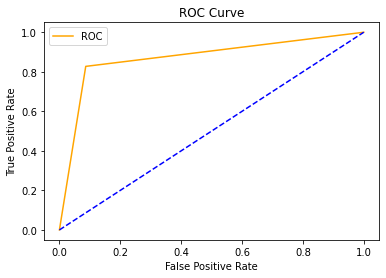

In [513]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Logistic regression**

In [514]:
#instantiating the model
lr=LogisticRegression()

In [516]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=22)

In [517]:
#Training the data
lr.fit(x_train,y_train)

LogisticRegression()

In [518]:
#calling the function and passing the dataset for random forest
metric_score(lr,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(lr,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:59.67%

=====Test Score=====
Accuracy Score:60.49%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70       185
           1       0.56      0.36      0.44       139

    accuracy                           0.60       324
   macro avg       0.59      0.57      0.57       324
weighted avg       0.60      0.60      0.59       324


 Confusion Matrix:
 [[146  39]
 [ 89  50]]

 F1 Score:
 0.6049382716049383


In [519]:
#Checking cross validation score
cv_score=cross_val_score(lr,x_new,y_new,cv=4).mean()
cv_score

0.5787037037037037

In [520]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [521]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.08648649 1.        ]
TPR [0.         0.82733813 1.        ]
Threshold [2 1 0]


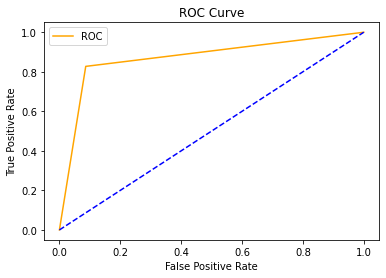

In [522]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support vector Machine**

In [540]:
#instantiatiating the model
svm=SVC()

In [541]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=22)

In [542]:
#Training the data
svm.fit(x_train,y_train)

SVC()

In [543]:
#calling the function and passing the dataset for gradient boosting
metric_score(svm,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(svm,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:57.82%

=====Test Score=====
Accuracy Score:57.41%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.99      0.73       185
           1       0.67      0.01      0.03       139

    accuracy                           0.57       324
   macro avg       0.62      0.50      0.38       324
weighted avg       0.61      0.57      0.43       324


 Confusion Matrix:
 [[184   1]
 [137   2]]

 F1 Score:
 0.5740740740740741


In [544]:
#Checking cross validation score
cv_score=cross_val_score(svm,x_new,y_new,cv=4).mean()
cv_score

0.5740740740740741

In [545]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [546]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.08648649 1.        ]
TPR [0.         0.82733813 1.        ]
Threshold [2 1 0]


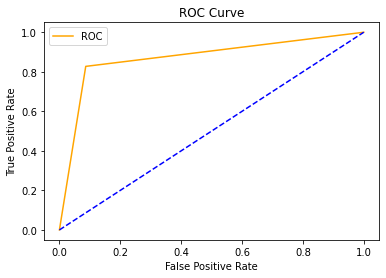

In [547]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [532]:
#Initiating Ada boost classifier
ada=AdaBoostClassifier()

In [533]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=22)

In [534]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [535]:
#calling the function and passing the dataset for ada boost
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:85.60%

=====Test Score=====
Accuracy Score:84.88%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       185
           1       0.86      0.77      0.81       139

    accuracy                           0.85       324
   macro avg       0.85      0.84      0.84       324
weighted avg       0.85      0.85      0.85       324


 Confusion Matrix:
 [[168  17]
 [ 32 107]]

 F1 Score:
 0.8487654320987654


In [536]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=4).mean()
cv_score

0.8171296296296295

In [537]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [538]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.08648649 1.        ]
TPR [0.         0.82733813 1.        ]
Threshold [2 1 0]


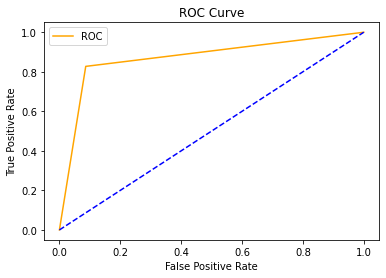

In [539]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [553]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Random Forest','Logistic Regression','SVM','Ada Boost'],
    'Training Score':[100,59.67,57.82,85.60],
    'Testing Score':[87.65,60.49,57.41,84.88],
    'Cross Val Score':[83.71,57.87,57.40,81.71],
    'F1 score':[87.65,60.49,57.40,84.87]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Random Forest,100.00,87.65,83.71,87.65
1,Logistic Regression,59.67,60.49,57.87,60.49
2,SVM,57.82,57.41,57.40,57.40
3,Ada Boost,85.60,84.88,81.71,84.87


**Observation**
* **By looking at this we can see that Random forest have seen all the data that is training score 100% and testing score is also highest.**
* **Cross validation score of random forest is also good which pretty close to the testimg score and f1_score is also same to as as testing score.**
* **Because of this reasons i will go forward with Random Forest Classifier.**

In [548]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [549]:
param_grid=({
    'n_estimators': [100,200,300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['gini', 'entropy']
})

In [551]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=4)

In [552]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [554]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [555]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',n_estimators=100)
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [556]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:99.49%

=====Test Score=====
Accuracy Score:86.42%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       185
           1       0.87      0.81      0.84       139

    accuracy                           0.86       324
   macro avg       0.86      0.86      0.86       324
weighted avg       0.86      0.86      0.86       324


 Confusion Matrix:
 [[168  17]
 [ 27 112]]

 F1 Score:
 0.8641975308641975


In [557]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8256845856845857

**So in this we can see that after doing hyperparameter tuning the training,testing,cross validation and f1 score reduced,so i will save the model on which hyperparameter tuning was not done.**

In [558]:
y_pred=rfc.predict(x_test)

In [559]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.8704258215049582

In [560]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Insurance Fraud Project','wb'))